In [0]:
import pandas as pd 
import datetime
import pandas_datareader.data as web 
from pandas import Series, DataFrame 
 
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2019, 1, 1) 
 
dfA = web.DataReader("AAPL", 'yahoo', start, end) 
dfG = web.DataReader("GOOG", 'yahoo', start, end) 



In [3]:
print(dfG.shape,dfA.shape)


(2264, 6) (2264, 6)


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


<Figure size 432x288 with 0 Axes>

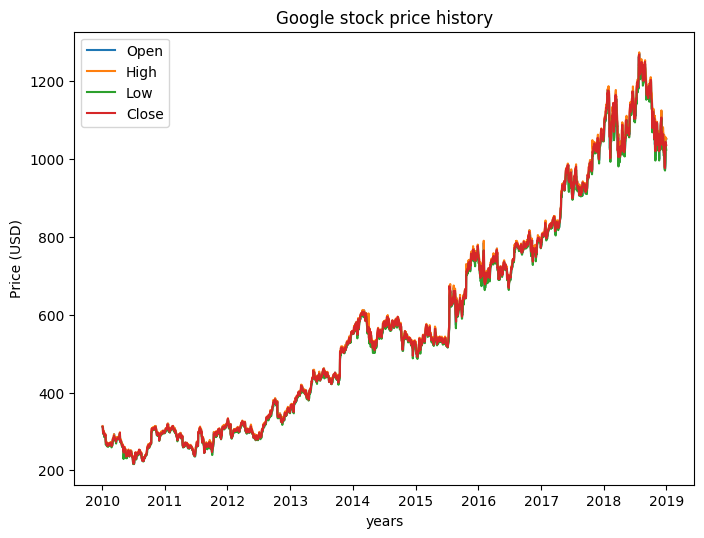

In [4]:
from matplotlib import pyplot as plt
plt.figure()
plt.figure(figsize=(8,6),dpi=100)
plt.plot(dfG["Open"])
plt.plot(dfG["High"])
plt.plot(dfG["Low"])
plt.plot(dfG["Close"])
plt.title('Google stock price history')
plt.ylabel('Price (USD)')
plt.xlabel('years')
plt.legend(['Open','High','Low','Close'], loc='upper left')
plt.show()

<Figure size 432x288 with 0 Axes>

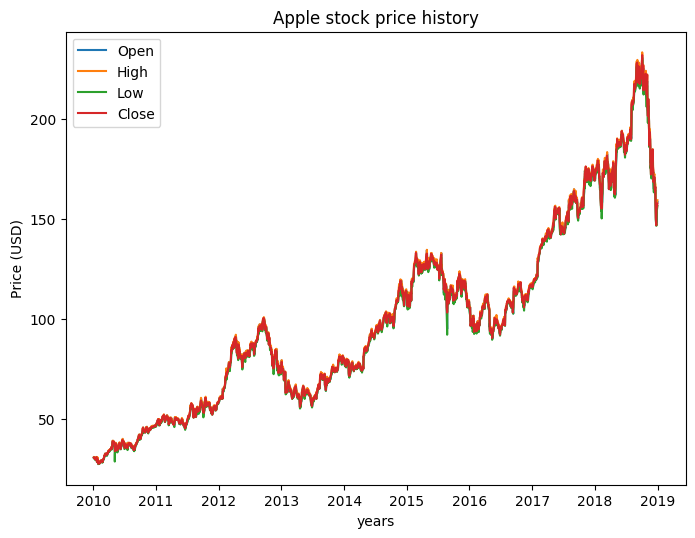

In [5]:
plt.figure()
plt.figure(figsize=(8,6),dpi=100)
plt.plot(dfA["Open"])
plt.plot(dfA["High"])
plt.plot(dfA["Low"])
plt.plot(dfA["Close"])
plt.title('Apple stock price history')
plt.ylabel('Price (USD)')
plt.xlabel('years')
plt.legend(['Open','High','Low','Close'], loc='upper left')
plt.show()

In [0]:
closeA = dfA.iloc[:,3].values
closeG = dfG.iloc[:,3].values


In [64]:
print(closeA.shape,closeG.shape)

(2264,) (2264,)


In [0]:
closeA=closeA.reshape(2264,1)
closeG=closeG.reshape(2264,1)
data=[[closeA],[closeG]]

In [0]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

dfA_train, dfA_test = train_test_split(closeA, train_size=0.8, test_size=0.2, shuffle=False)
dfG_train, dfG_test = train_test_split(closeG, train_size=0.8, test_size=0.2, shuffle=False)


# scale the feature MinMax, build array
min_max_scaler = MinMaxScaler(feature_range = (0, 1))
x_trainA = min_max_scaler.fit_transform(dfA_train)
x_testA = min_max_scaler.fit_transform(dfA_test)
x_trainG = min_max_scaler.fit_transform(dfG_train)
x_testG = min_max_scaler.fit_transform(dfG_test)

In [67]:
print("Train and Test size", len(dfG_train), len(dfG_test))

Train and Test size 1811 453


In [68]:
print("Train and Test size", len(dfA_train), len(dfA_test))

Train and Test size 1811 453


In [0]:
X_trainA = []
y_trainA = []
import numpy as np
for i in range(30, 1800):
    X_trainA.append(x_trainA[i-30:i,0])
    y_trainA.append(x_trainA[i,0])
    
X_trainA, y_trainA = np.array(X_trainA), np.array(y_trainA)

X_trainA = np.reshape(X_trainA,(X_trainA.shape[0],X_trainA.shape[1], ))


In [0]:
X_trainG = []
y_trainG = []
import numpy as np
for i in range(30, 1800):
    X_trainG.append(x_trainG[i-30:i,0])
    y_trainG.append(x_trainG[i,0])
    
X_trainG, y_trainG = np.array(X_trainG), np.array(y_trainG)

X_trainG = np.reshape(X_trainG,(X_trainG.shape[0],X_trainG.shape[1],))


In [0]:
datatrain=np.zeros((1770,30,2))
datatrain[:,:,0]=X_trainG 
datatrain[:,:,1]=X_trainA 


In [0]:
y_train=np.zeros((1770,2))
y_train[:,0]=y_trainG
y_train[:,1]=y_trainA



In [0]:
X_testA = []
y_testA= []
import numpy as np
for i in range(30, 450):
    X_testA.append(x_testA[i-30:i,0])
    y_testA.append(x_testA[i,0])
    
X_testA, y_testA = np.array(X_testA), np.array(y_testA)



In [0]:
X_testG = []
y_testG= []
import numpy as np
for i in range(30, 450):
    X_testG.append(x_testG[i-30:i,0])
    y_testG.append(x_testG[i,0])
    
X_testG, y_testG = np.array(X_testG), np.array(y_testG)



In [0]:
datatest=np.zeros((420,30,2))
datatest[:,:,0]=X_testG 
datatest[:,:,1]=X_testA
 
y_test=np.zeros((420,2))
y_test[:,0]=y_testG
y_test[:,1]=y_testA


In [95]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import datetime


regressorLSTM = Sequential()

regressorLSTM.add(LSTM(units = 50, return_sequences = True, input_shape = (datatrain.shape[1], 2)))
regressorLSTM.add(Dropout(0.2))

regressorLSTM.add(LSTM(units = 50, return_sequences = True))
regressorLSTM.add(Dropout(0.2))

regressorLSTM.add(LSTM(units = 50, return_sequences = True))
regressorLSTM.add(Dropout(0.2))

regressorLSTM.add(LSTM(units = 50))
regressorLSTM.add(Dropout(0.2))

regressorLSTM.add(Dense(units = 2))
from keras import optimizers
adam=optimizers.adam(lr=0.01)
regressorLSTM.compile(optimizer = adam, loss = 'mean_squared_error')

start=datetime.datetime.now()
LSTM_trained_model=regressorLSTM.fit(datatrain, y_train, epochs = 30, batch_size = 32)
end=datetime.datetime.now()


Epoch 1/30
1770/1770 [==============================] - 15s 8ms/step - loss: 0.0527
Epoch 2/30
1770/1770 [==============================] - 10s 6ms/step - loss: 0.0050
Epoch 3/30
1770/1770 [==============================] - 10s 6ms/step - loss: 0.0041
Epoch 4/30
1770/1770 [==============================] - 10s 6ms/step - loss: 0.0042
Epoch 5/30
1770/1770 [==============================] - 10s 6ms/step - loss: 0.0033
Epoch 6/30
1770/1770 [==============================] - 10s 6ms/step - loss: 0.0031
Epoch 7/30
1770/1770 [==============================] - 10s 6ms/step - loss: 0.0030
Epoch 8/30
1770/1770 [==============================] - 10s 6ms/step - loss: 0.0024
Epoch 9/30
1770/1770 [==============================] - 10s 6ms/step - loss: 0.0023
Epoch 10/30
1770/1770 [==============================] - 10s 6ms/step - loss: 0.0026
Epoch 11/30
1770/1770 [==============================] - 10s 6ms/step - loss: 0.0022
Epoch 12/30
1770/1770 [==============================] - 10s 6ms/step - lo

In [96]:

Total_time_training=end-start
print ('Total_time_training:',Total_time_training )


Total_time_training: 0:05:07.159766


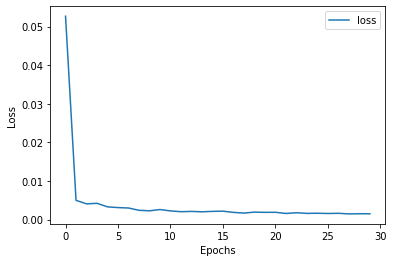

In [97]:

history=LSTM_trained_model.history

losses=history['loss']
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(losses)
plt.legend(['loss'])



In [0]:
predicted_stock_price = regressorLSTM.predict(datatest)
predicted_stock_price = min_max_scaler.inverse_transform(predicted_stock_price)
real_stock_price = min_max_scaler.inverse_transform(y_test)

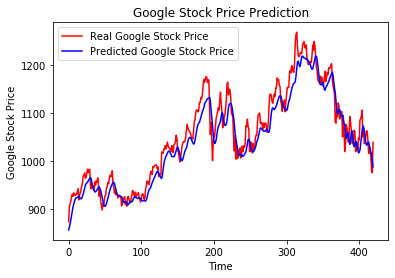

In [99]:

plt.plot(real_stock_price[:,0],color='red', label='Real Google Stock Price ')
plt.plot(predicted_stock_price[:,0],color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

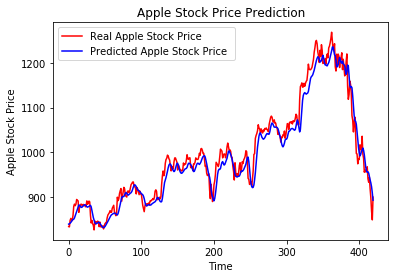

In [100]:
plt.plot(real_stock_price[:,1],color='red', label='Real Apple Stock Price ')
plt.plot(predicted_stock_price[:,1],color='blue', label='Predicted Apple Stock Price ')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

In [101]:
regressorLSTM.evaluate(datatest,y_test)

420/420 [==============================] - 2s 5ms/step


0.003185098529571579

In [87]:
from keras.layers import GRU
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(datatrain.shape[1], 2)))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=50))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=2))
from keras import optimizers
adam=optimizers.adam(lr=0.01)
# Compiling the RNN
regressorGRU.compile(optimizer=adam,loss='mean_squared_error')
# Fitting to the training set

start=datetime.datetime.now()
GRU_trained_model=regressorGRU.fit(datatrain, y_train, epochs = 30, batch_size = 32)
end=datetime.datetime.now()


Epoch 1/30
1770/1770 [==============================] - 12s 7ms/step - loss: 0.0300
Epoch 2/30
1770/1770 [==============================] - 9s 5ms/step - loss: 0.0042
Epoch 3/30
1770/1770 [==============================] - 8s 5ms/step - loss: 0.0041
Epoch 4/30
1770/1770 [==============================] - 9s 5ms/step - loss: 0.0034
Epoch 5/30
1770/1770 [==============================] - 9s 5ms/step - loss: 0.0027
Epoch 6/30
1770/1770 [==============================] - 9s 5ms/step - loss: 0.0027
Epoch 7/30
1770/1770 [==============================] - 9s 5ms/step - loss: 0.0025
Epoch 8/30
1770/1770 [==============================] - 9s 5ms/step - loss: 0.0023
Epoch 9/30
1770/1770 [==============================] - 9s 5ms/step - loss: 0.0022
Epoch 10/30
1770/1770 [==============================] - 9s 5ms/step - loss: 0.0021
Epoch 11/30
1770/1770 [==============================] - 9s 5ms/step - loss: 0.0022
Epoch 12/30
1770/1770 [==============================] - 9s 5ms/step - loss: 0.0017


In [88]:

Total_time_training=end-start
print ('Total_time_training:',Total_time_training )


Total_time_training: 0:04:22.212603


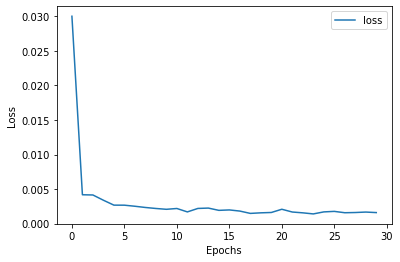

In [103]:

history=GRU_trained_model.history

losses=history['loss']
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(losses)
plt.legend(['loss'])

In [0]:
predicted_stock_price = regressorGRU.predict(datatest)
predicted_stock_price = min_max_scaler.inverse_transform(predicted_stock_price)
real_stock_price = min_max_scaler.inverse_transform(y_test)

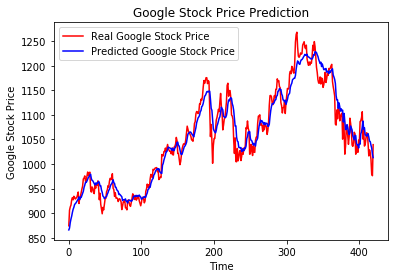

In [105]:
plt.plot(real_stock_price[:,0],color='red', label='Real Google Stock Price ')
plt.plot(predicted_stock_price[:,0],color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

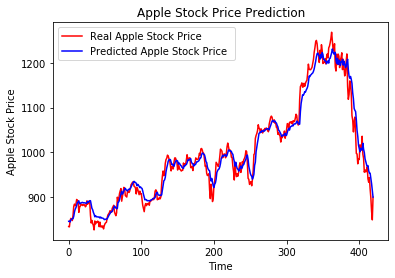

In [92]:
plt.plot(real_stock_price[:,1],color='red', label='Real Apple Stock Price ')
plt.plot(predicted_stock_price[:,1],color='blue', label='Predicted Apple Stock Price ')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

In [106]:
regressorGRU.evaluate(datatest,y_test)

420/420 [==============================] - 2s 5ms/step


0.0023382891146909624

In [111]:
# The RNN architecture
from keras.layers import SimpleRNN as rnn
regressorRNN = Sequential()
# First RNN layer with Dropout 
regressorRNN.add(rnn(units=50, activation='tanh', return_sequences=True, input_shape=(datatrain.shape[1], 2)))
regressorRNN.add(Dropout(0.2))
# Second RNN layer
regressorRNN.add(rnn(units=50, return_sequences=True))
regressorRNN.add(Dropout(0.2))
# Third RNN layer
regressorRNN.add(rnn(units=50, return_sequences=True))
regressorRNN.add(Dropout(0.2))
# Fourth RNN layer
regressorRNN.add(rnn(units=50))
regressorRNN.add(Dropout(0.2))
# The output layer
regressorRNN.add(Dense(units=2))
from keras import optimizers
adam=optimizers.adam(lr=0.01)
# Compiling the RNN
regressorRNN.compile(optimizer=adam,loss='mean_squared_error')
# Fitting to the training set
RNN_trained_model=regressorRNN.fit(datatrain, y_train, epochs = 30, batch_size = 32)

Epoch 1/30
1770/1770 [==============================] - 8s 4ms/step - loss: 0.4136
Epoch 2/30
1770/1770 [==============================] - 4s 2ms/step - loss: 0.1463
Epoch 3/30
1770/1770 [==============================] - 4s 2ms/step - loss: 0.0422
Epoch 4/30
1770/1770 [==============================] - 4s 2ms/step - loss: 0.0167
Epoch 5/30
1770/1770 [==============================] - 4s 2ms/step - loss: 0.0131
Epoch 6/30
1770/1770 [==============================] - 4s 2ms/step - loss: 0.0115
Epoch 7/30
1770/1770 [==============================] - 4s 2ms/step - loss: 0.0120
Epoch 8/30
1770/1770 [==============================] - 4s 2ms/step - loss: 0.0112
Epoch 9/30
1770/1770 [==============================] - 4s 2ms/step - loss: 0.0118
Epoch 10/30
1770/1770 [==============================] - 4s 2ms/step - loss: 0.0111
Epoch 11/30
1770/1770 [==============================] - 4s 2ms/step - loss: 0.0125
Epoch 12/30
1770/1770 [==============================] - 4s 2ms/step - loss: 0.0110
E

In [112]:

Total_time_training=end-start
print ('Total_time_training:',Total_time_training )


Total_time_training: 0:05:07.159766


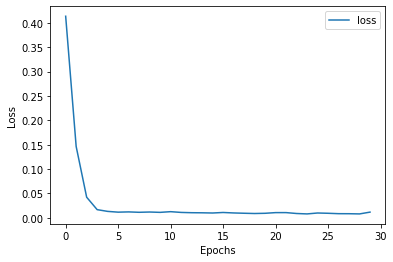

In [113]:

history=RNN_trained_model.history

lossRNN=history['loss']
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(lossRNN)
plt.legend(['loss'])

In [0]:
predicted_stock_price = regressorRNN.predict(datatest)
predicted_stock_price = min_max_scaler.inverse_transform(predicted_stock_price)
real_stock_price = min_max_scaler.inverse_transform(y_test)

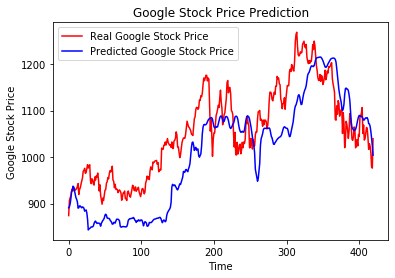

In [115]:
plt.plot(real_stock_price[:,0],color='red', label='Real Google Stock Price ')
plt.plot(predicted_stock_price[:,0],color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

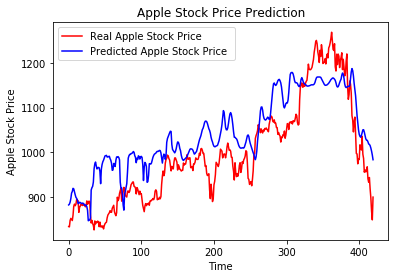

In [116]:
plt.plot(real_stock_price[:,1],color='red', label='Real Apple Stock Price ')
plt.plot(predicted_stock_price[:,1],color='blue', label='Predicted Apple Stock Price ')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

In [117]:
regressorRNN.evaluate(datatest,y_test)

420/420 [==============================] - 2s 5ms/step


0.027303786327441532

In [0]:
predicted_stock_priceLSTM = regressorLSTM.predict(datatest)
predicted_stock_priceGRU = regressorGRU.predict(datatest)
predicted_stock_priceRNN = regressorRNN.predict(datatest)

predicted_stock_priceLSTM = min_max_scaler.inverse_transform(predicted_stock_priceLSTM)
predicted_stock_priceGRU = min_max_scaler.inverse_transform(predicted_stock_priceGRU)
predicted_stock_priceRNN= min_max_scaler.inverse_transform(predicted_stock_priceRNN)

real_stock_price = min_max_scaler.inverse_transform(y_test)

<Figure size 432x288 with 0 Axes>

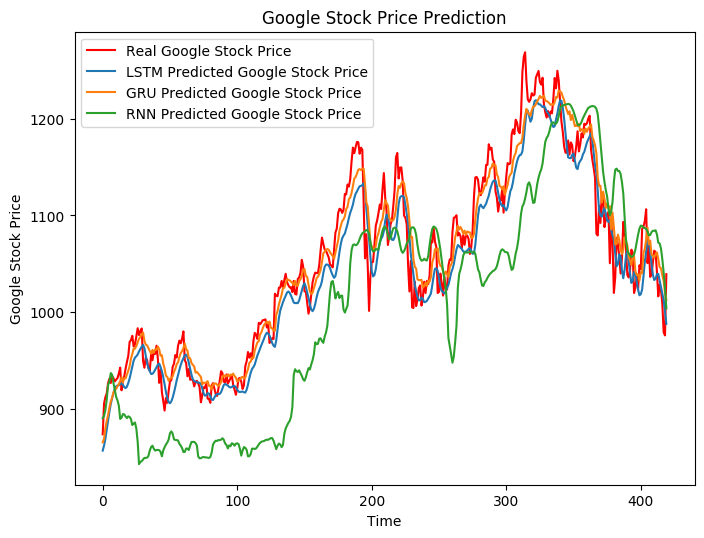

In [121]:
plt.figure()
plt.figure(figsize=(8,6),dpi=100)
plt.plot(real_stock_price[:,0],color='red', label='Real Google Stock Price ')
plt.plot(predicted_stock_priceLSTM[:,0], label='LSTM Predicted Google Stock Price')
plt.plot(predicted_stock_priceGRU[:,0], label='GRU Predicted Google Stock Price')
plt.plot(predicted_stock_priceRNN[:,0], label='RNN Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

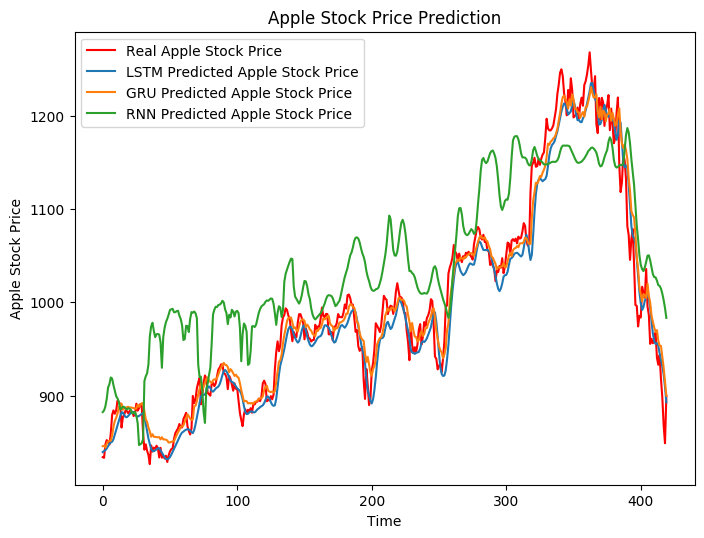

In [124]:
plt.figure()
plt.figure(figsize=(8,6),dpi=100)
plt.plot(real_stock_price[:,1],color='red', label='Real Apple Stock Price ')
plt.plot(predicted_stock_priceLSTM[:,1], label='LSTM Predicted Apple Stock Price')
plt.plot(predicted_stock_priceGRU[:,1], label='GRU Predicted Apple Stock Price')
plt.plot(predicted_stock_priceRNN[:,1], label='RNN Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

In [126]:
print(regressorLSTM.evaluate(datatest,y_test))
print(regressorGRU.evaluate(datatest,y_test))
print(regressorRNN.evaluate(datatest,y_test))

420/420 [==============================] - 1s 2ms/step
0.003185098529571579
420/420 [==============================] - 1s 2ms/step
0.0023382891146909624
420/420 [==============================] - 1s 2ms/step
0.027303786327441532


In [128]:
from keras.layers import GRU
regressorGRU1 = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU1.add(GRU(units=50, return_sequences=True, input_shape=(datatrain.shape[1], 2)))
regressorGRU1.add(Dropout(0.1))
# Second GRU layer
regressorGRU1.add(GRU(units=50, return_sequences=True))
regressorGRU1.add(Dropout(0.1))
# Third GRU layer
regressorGRU1.add(GRU(units=50, return_sequences=True))
regressorGRU1.add(Dropout(0.1))
# Fourth GRU layer
regressorGRU1.add(GRU(units=50))
regressorGRU1.add(Dropout(0.1))
# The output layer
regressorGRU1.add(Dense(units=2))
from keras import optimizers
adam=optimizers.adam(lr=0.01)
# Compiling the RNN
regressorGRU1.compile(optimizer=adam,loss='mean_squared_error')
# Fitting to the training set

start=datetime.datetime.now()
GRU_trained_model1=regressorGRU1.fit(datatrain, y_train, epochs = 30, batch_size = 32)
end=datetime.datetime.now()


Epoch 1/30
1770/1770 [==============================] - 14s 8ms/step - loss: 0.0377
Epoch 2/30
1770/1770 [==============================] - 8s 5ms/step - loss: 0.0030
Epoch 3/30
1770/1770 [==============================] - 8s 5ms/step - loss: 0.0028
Epoch 4/30
1770/1770 [==============================] - 8s 5ms/step - loss: 0.0020
Epoch 5/30
1770/1770 [==============================] - 8s 5ms/step - loss: 0.0020
Epoch 6/30
1770/1770 [==============================] - 8s 5ms/step - loss: 0.0018
Epoch 7/30
1770/1770 [==============================] - 8s 5ms/step - loss: 0.0016
Epoch 8/30
1770/1770 [==============================] - 8s 5ms/step - loss: 0.0017
Epoch 9/30
1770/1770 [==============================] - 8s 5ms/step - loss: 0.0014
Epoch 10/30
1770/1770 [==============================] - 8s 5ms/step - loss: 0.0014
Epoch 11/30
1770/1770 [==============================] - 8s 5ms/step - loss: 0.0015
Epoch 12/30
1770/1770 [==============================] - 8s 5ms/step - loss: 0.0014


In [129]:

Total_time_training=end-start
print ('Total_time_training:',Total_time_training )


Total_time_training: 0:04:17.566968


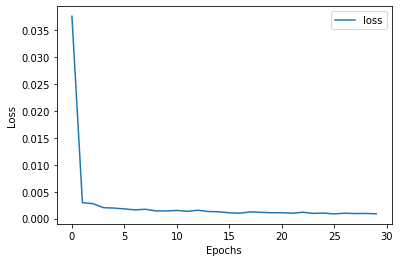

In [134]:

history=GRU_trained_model1.history

losses=history['loss']
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(losses)
plt.legend(['loss'])



<Figure size 432x288 with 0 Axes>

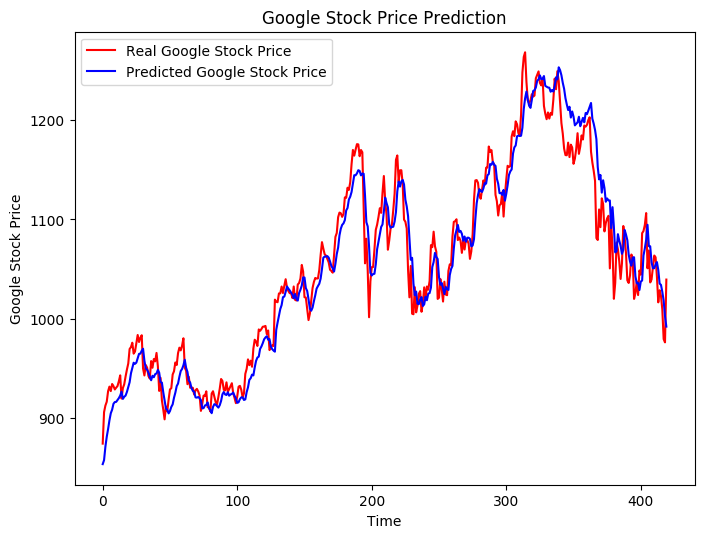

In [139]:
predicted_stock_price = regressorGRU1.predict(datatest)
predicted_stock_price = min_max_scaler.inverse_transform(predicted_stock_price)
real_stock_price = min_max_scaler.inverse_transform(y_test)

plt.figure()
plt.figure(figsize=(8,6),dpi=100)
plt.plot(real_stock_price[:,0],color='red', label='Real Google Stock Price ')
plt.plot(predicted_stock_price[:,0],color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

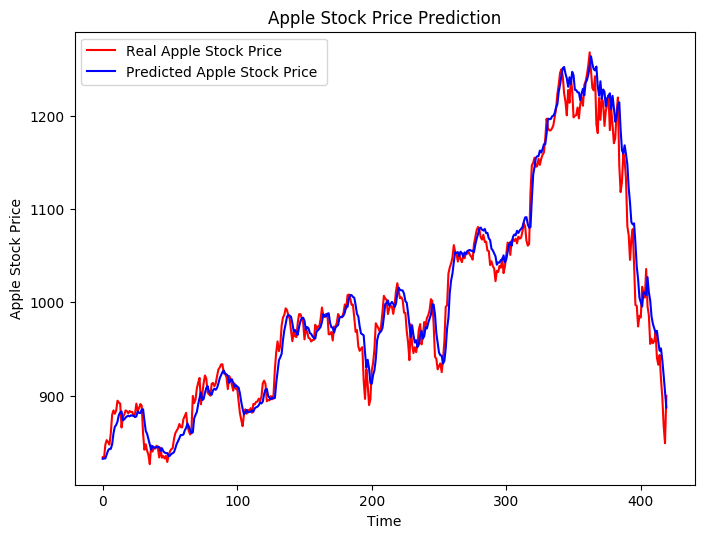

In [140]:
plt.figure()
plt.figure(figsize=(8,6),dpi=100)
plt.plot(real_stock_price[:,1],color='red', label='Real Apple Stock Price ')
plt.plot(predicted_stock_price[:,1],color='blue', label='Predicted Apple Stock Price ')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

In [141]:
regressorGRU1.evaluate(datatest,y_test)

420/420 [==============================] - 1s 2ms/step


0.0022150308381588685

In [142]:
from keras.layers import GRU
regressorGRU2 = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU2.add(GRU(units=50, return_sequences=True, input_shape=(datatrain.shape[1], 2)))
regressorGRU2.add(Dropout(0.05))
# Second GRU layer
regressorGRU2.add(GRU(units=50, return_sequences=True))
regressorGRU2.add(Dropout(0.05))
# Third GRU layer
regressorGRU2.add(GRU(units=50, return_sequences=True))
regressorGRU2.add(Dropout(0.05))
# Fourth GRU layer
regressorGRU2.add(GRU(units=50))
regressorGRU2.add(Dropout(0.05))
# The output layer
regressorGRU2.add(Dense(units=2))
from keras import optimizers
adam=optimizers.adam(lr=0.01)
# Compiling the RNN
regressorGRU2.compile(optimizer=adam,loss='mean_squared_error')
# Fitting to the training set

start=datetime.datetime.now()
GRU_trained_model2=regressorGRU2.fit(datatrain, y_train, epochs = 30, batch_size = 32)
end=datetime.datetime.now()

Epoch 1/30
1770/1770 [==============================] - 15s 9ms/step - loss: 0.0419
Epoch 2/30
1770/1770 [==============================] - 8s 5ms/step - loss: 0.0020
Epoch 3/30
1770/1770 [==============================] - 9s 5ms/step - loss: 0.0018
Epoch 4/30
1770/1770 [==============================] - 8s 5ms/step - loss: 0.0017
Epoch 5/30
1770/1770 [==============================] - 8s 5ms/step - loss: 0.0015
Epoch 6/30
1770/1770 [==============================] - 8s 5ms/step - loss: 0.0016
Epoch 7/30
1770/1770 [==============================] - 8s 5ms/step - loss: 0.0013
Epoch 8/30
1770/1770 [==============================] - 8s 4ms/step - loss: 0.0012
Epoch 9/30
1770/1770 [==============================] - 8s 5ms/step - loss: 0.0011
Epoch 10/30
1770/1770 [==============================] - 8s 5ms/step - loss: 0.0012
Epoch 11/30
1770/1770 [==============================] - 8s 5ms/step - loss: 0.0016
Epoch 12/30
1770/1770 [==============================] - 8s 5ms/step - loss: 9.9233e

In [143]:

Total_time_training=end-start
print ('Total_time_training:',Total_time_training )


Total_time_training: 0:04:16.315015


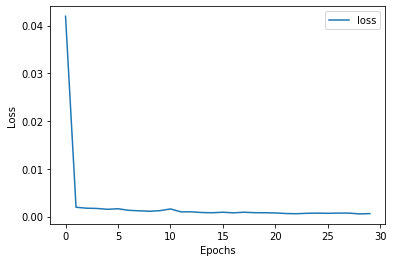

In [144]:

history=GRU_trained_model2.history

losses=history['loss']
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(losses)
plt.legend(['loss'])

<Figure size 432x288 with 0 Axes>

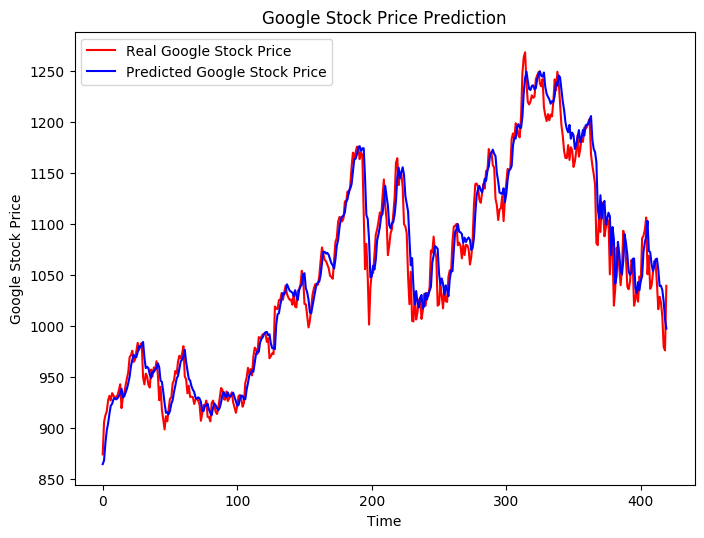

In [148]:
predicted_stock_price = regressorGRU2.predict(datatest)
predicted_stock_price = min_max_scaler.inverse_transform(predicted_stock_price)
real_stock_price = min_max_scaler.inverse_transform(y_test)

plt.figure()
plt.figure(figsize=(8,6),dpi=100)
plt.plot(real_stock_price[:,0],color='red', label='Real Google Stock Price ')
plt.plot(predicted_stock_price[:,0],color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

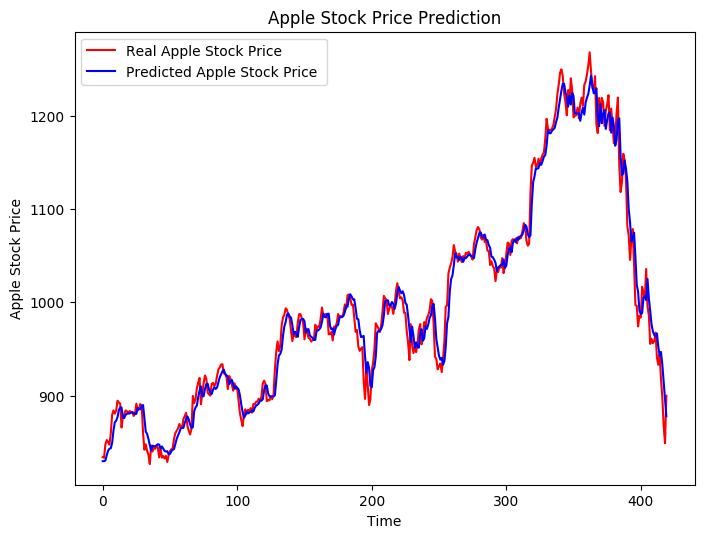

In [149]:
plt.figure()
plt.figure(figsize=(8,6),dpi=100)
plt.plot(real_stock_price[:,1],color='red', label='Real Apple Stock Price ')
plt.plot(predicted_stock_price[:,1],color='blue', label='Predicted Apple Stock Price ')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

In [150]:
regressorGRU2.evaluate(datatest,y_test)

420/420 [==============================] - 1s 2ms/step


0.0015844204352192936

In [151]:
from keras.layers import GRU
regressorGRU3 = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU3.add(GRU(units=50, return_sequences=True, input_shape=(datatrain.shape[1], 2)))
regressorGRU3.add(Dropout(0.05))
# Second GRU layer
regressorGRU3.add(GRU(units=50, return_sequences=True))
regressorGRU3.add(Dropout(0.05))
# Third GRU layer
regressorGRU3.add(GRU(units=50, return_sequences=True))
regressorGRU3.add(Dropout(0.05))
# Fourth GRU layer
regressorGRU3.add(GRU(units=50))
regressorGRU3.add(Dropout(0.05))
# The output layer
regressorGRU3.add(Dense(units=2))
from keras import optimizers
adam=optimizers.adam(lr=0.01)
# Compiling the RNN
regressorGRU3.compile(optimizer=adam,loss='mape')
# Fitting to the training set

start=datetime.datetime.now()
GRU_trained_model2=regressorGRU3.fit(datatrain, y_train, epochs = 30, batch_size = 32)
end=datetime.datetime.now()

Epoch 1/30
1770/1770 [==============================] - 17s 9ms/step - loss: 5757.8036
Epoch 2/30
1770/1770 [==============================] - 8s 5ms/step - loss: 10975.3193
Epoch 3/30
1770/1770 [==============================] - 9s 5ms/step - loss: 68743.4130
Epoch 4/30
1770/1770 [==============================] - 8s 5ms/step - loss: 1102740.1869
Epoch 5/30
1770/1770 [==============================] - 8s 5ms/step - loss: 278454.0964
Epoch 6/30
1770/1770 [==============================] - 9s 5ms/step - loss: 623406.0624
Epoch 7/30
1770/1770 [==============================] - 8s 5ms/step - loss: 309227.1906
Epoch 8/30
1770/1770 [==============================] - 8s 5ms/step - loss: 517370.2526
Epoch 9/30
1770/1770 [==============================] - 8s 5ms/step - loss: 289702.1137
Epoch 10/30
1770/1770 [==============================] - 8s 5ms/step - loss: 560054.1470
Epoch 11/30
1770/1770 [==============================] - 8s 5ms/step - loss: 266981.5631
Epoch 12/30
1770/1770 [=========

In [152]:

Total_time_training=end-start
print ('Total_time_training:',Total_time_training )


Total_time_training: 0:04:18.487315


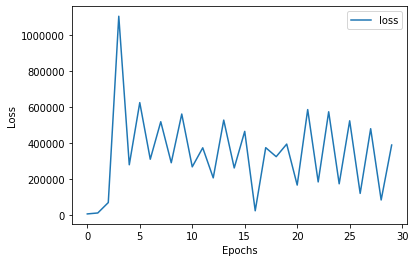

In [154]:

history=GRU_trained_model2.history

losses=history['loss']
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(losses)
plt.legend(['loss'])

<Figure size 432x288 with 0 Axes>

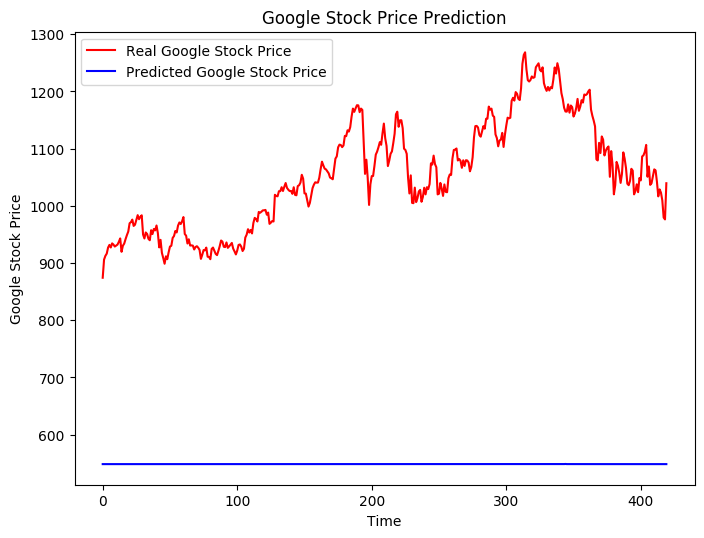

In [155]:
predicted_stock_price = regressorGRU3.predict(datatest)
predicted_stock_price = min_max_scaler.inverse_transform(predicted_stock_price)
real_stock_price = min_max_scaler.inverse_transform(y_test)

plt.figure()
plt.figure(figsize=(8,6),dpi=100)
plt.plot(real_stock_price[:,0],color='red', label='Real Google Stock Price ')
plt.plot(predicted_stock_price[:,0],color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

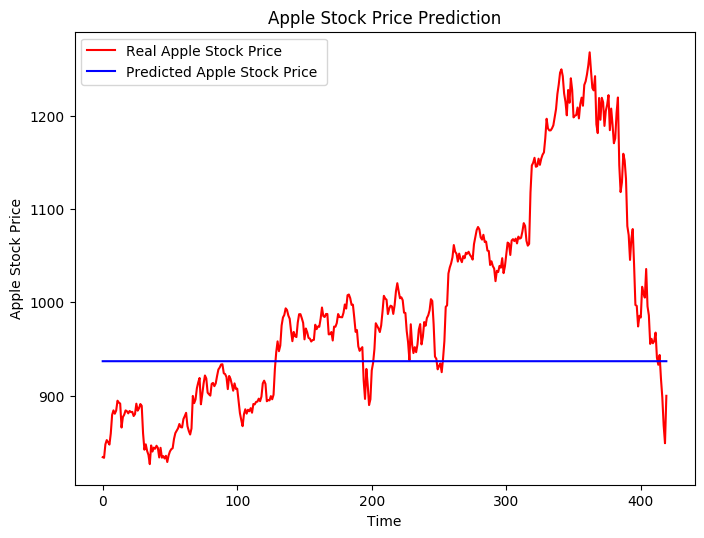

In [156]:
plt.figure()
plt.figure(figsize=(8,6),dpi=100)
plt.plot(real_stock_price[:,1],color='red', label='Real Apple Stock Price ')
plt.plot(predicted_stock_price[:,1],color='blue', label='Predicted Apple Stock Price ')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

In [160]:
from keras.layers import GRU
regressorGRU4 = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU4.add(GRU(units=50, return_sequences=True, input_shape=(datatrain.shape[1], 2)))
regressorGRU4.add(Dropout(0.05))
# Second GRU layer
regressorGRU4.add(GRU(units=50, return_sequences=True))
regressorGRU4.add(Dropout(0.05))
# Third GRU layer
regressorGRU4.add(GRU(units=50, return_sequences=True))
regressorGRU4.add(Dropout(0.05))
# Fourth GRU layer
regressorGRU4.add(GRU(units=50))
regressorGRU4.add(Dropout(0.05))
# The output layer
regressorGRU4.add(Dense(units=2))
from keras import optimizers
Adagrad=optimizers.Adagrad(lr=0.01)
# Compiling the RNN
regressorGRU4.compile(optimizer=Adagrad,loss='mean_squared_error')
# Fitting to the training set

start=datetime.datetime.now()
GRU_trained_model4=regressorGRU4.fit(datatrain, y_train, epochs = 30, batch_size = 32)
end=datetime.datetime.now()

Epoch 1/30
1770/1770 [==============================] - 17s 10ms/step - loss: 0.0388
Epoch 2/30
1770/1770 [==============================] - 9s 5ms/step - loss: 0.0025
Epoch 3/30
1770/1770 [==============================] - 8s 5ms/step - loss: 0.0022
Epoch 4/30
1770/1770 [==============================] - 8s 5ms/step - loss: 0.0021
Epoch 5/30
1770/1770 [==============================] - 9s 5ms/step - loss: 0.0020
Epoch 6/30
1770/1770 [==============================] - 8s 5ms/step - loss: 0.0019
Epoch 7/30
1770/1770 [==============================] - 8s 5ms/step - loss: 0.0018
Epoch 8/30
1770/1770 [==============================] - 8s 5ms/step - loss: 0.0019
Epoch 9/30
1770/1770 [==============================] - 8s 5ms/step - loss: 0.0017
Epoch 10/30
1770/1770 [==============================] - 8s 5ms/step - loss: 0.0017
Epoch 11/30
1770/1770 [==============================] - 8s 5ms/step - loss: 0.0017
Epoch 12/30
1770/1770 [==============================] - 8s 5ms/step - loss: 0.0015

In [161]:

Total_time_training=end-start
print ('Total_time_training:',Total_time_training )


Total_time_training: 0:04:13.201988


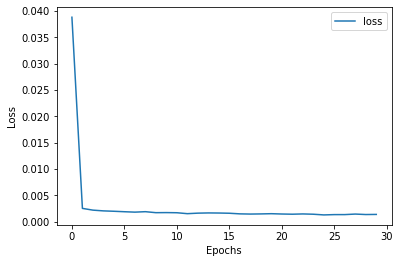

In [162]:

history=GRU_trained_model4.history

losses=history['loss']
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(losses)
plt.legend(['loss'])

<Figure size 432x288 with 0 Axes>

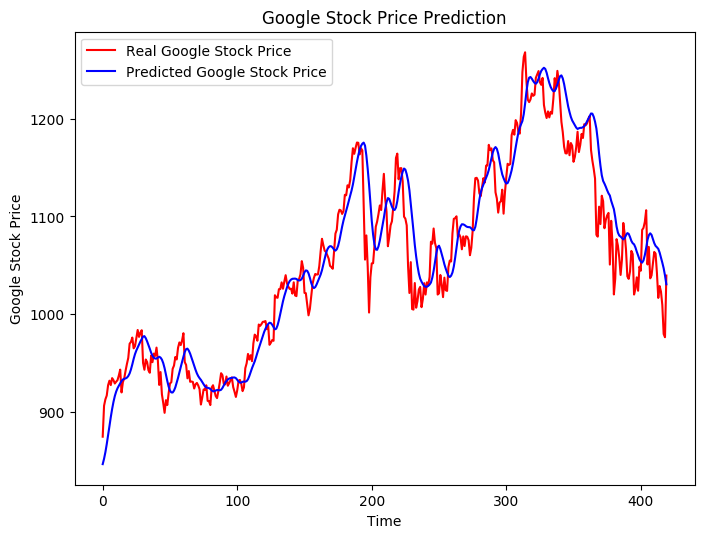

In [163]:
predicted_stock_price = regressorGRU4.predict(datatest)
predicted_stock_price = min_max_scaler.inverse_transform(predicted_stock_price)
real_stock_price = min_max_scaler.inverse_transform(y_test)

plt.figure()
plt.figure(figsize=(8,6),dpi=100)
plt.plot(real_stock_price[:,0],color='red', label='Real Google Stock Price ')
plt.plot(predicted_stock_price[:,0],color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

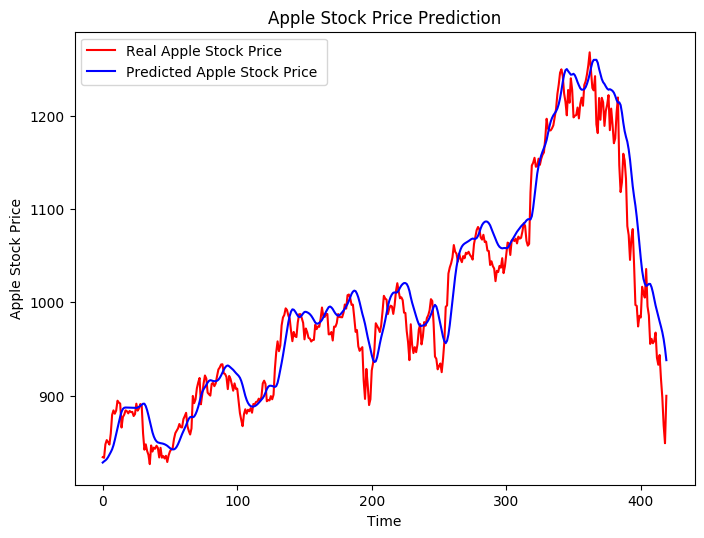

In [164]:
plt.figure()
plt.figure(figsize=(8,6),dpi=100)
plt.plot(real_stock_price[:,1],color='red', label='Real Apple Stock Price ')
plt.plot(predicted_stock_price[:,1],color='blue', label='Predicted Apple Stock Price ')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

In [165]:
regressorGRU4.evaluate(datatest,y_test)

420/420 [==============================] - 4s 10ms/step


0.004693527732576643

In [166]:
from keras.layers import GRU
regressorGRU5 = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU5.add(GRU(units=50, return_sequences=True, input_shape=(datatrain.shape[1], 2)))
regressorGRU5.add(Dropout(0.05))
# Second GRU layer
regressorGRU5.add(GRU(units=50, return_sequences=True))
regressorGRU5.add(Dropout(0.05))
# Third GRU layer
regressorGRU5.add(GRU(units=50, return_sequences=True))
regressorGRU5.add(Dropout(0.05))
# Fourth GRU layer
regressorGRU5.add(GRU(units=50))
regressorGRU5.add(Dropout(0.05))
# The output layer
regressorGRU5.add(Dense(units=2))
from keras import optimizers
RMSprop=optimizers.RMSprop(lr=0.01)
# Compiling the RNN
regressorGRU5.compile(optimizer=RMSprop,loss='mean_squared_error')
# Fitting to the training set

start=datetime.datetime.now()
GRU_trained_model5=regressorGRU5.fit(datatrain, y_train, epochs = 30, batch_size = 32)
end=datetime.datetime.now()

Epoch 1/30
1770/1770 [==============================] - 18s 10ms/step - loss: 0.1786
Epoch 2/30
1770/1770 [==============================] - 8s 5ms/step - loss: 0.0412
Epoch 3/30
1770/1770 [==============================] - 9s 5ms/step - loss: 0.0227
Epoch 4/30
1770/1770 [==============================] - 8s 5ms/step - loss: 0.0161
Epoch 5/30
1770/1770 [==============================] - 8s 5ms/step - loss: 0.0106
Epoch 6/30
1770/1770 [==============================] - 9s 5ms/step - loss: 0.0083
Epoch 7/30
1770/1770 [==============================] - 9s 5ms/step - loss: 0.0087
Epoch 8/30
1770/1770 [==============================] - 9s 5ms/step - loss: 0.0064
Epoch 9/30
1770/1770 [==============================] - 9s 5ms/step - loss: 0.0067
Epoch 10/30
1770/1770 [==============================] - 9s 5ms/step - loss: 0.0053
Epoch 11/30
1770/1770 [==============================] - 9s 5ms/step - loss: 0.0050
Epoch 12/30
1770/1770 [==============================] - 9s 5ms/step - loss: 0.0044

In [167]:

Total_time_training=end-start
print ('Total_time_training:',Total_time_training )


Total_time_training: 0:04:29.849031


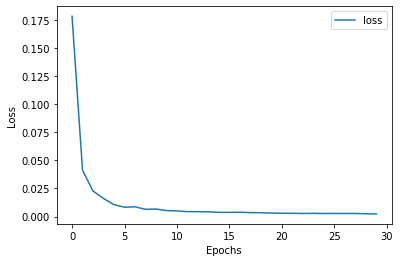

In [168]:

history=GRU_trained_model5.history

losses=history['loss']
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(losses)
plt.legend(['loss'])

<Figure size 432x288 with 0 Axes>

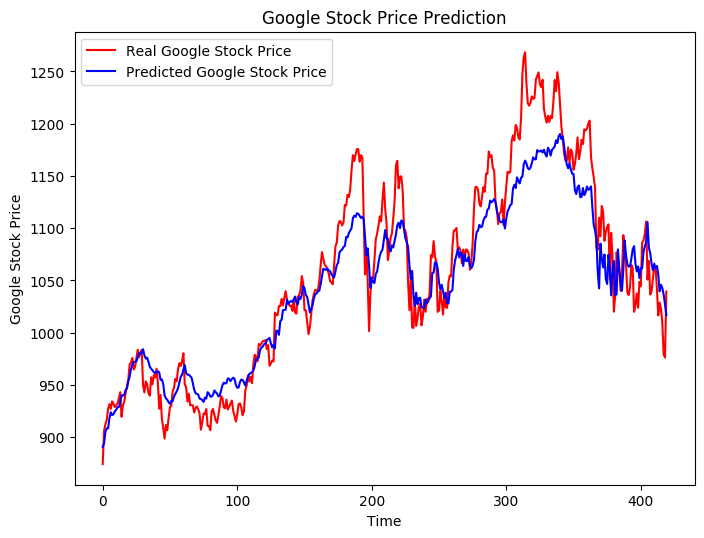

In [170]:
predicted_stock_price = regressorGRU5.predict(datatest)
predicted_stock_price = min_max_scaler.inverse_transform(predicted_stock_price)
real_stock_price = min_max_scaler.inverse_transform(y_test)

plt.figure()
plt.figure(figsize=(8,6),dpi=100)
plt.plot(real_stock_price[:,0],color='red', label='Real Google Stock Price ')
plt.plot(predicted_stock_price[:,0],color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

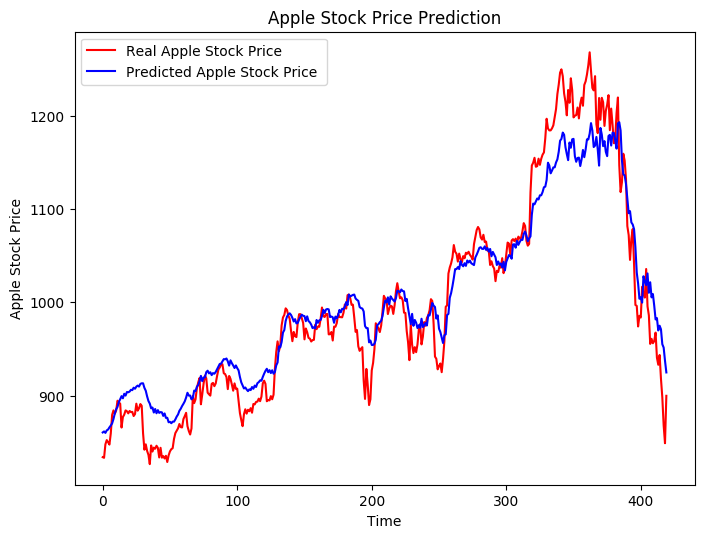

In [171]:
plt.figure()
plt.figure(figsize=(8,6),dpi=100)
plt.plot(real_stock_price[:,1],color='red', label='Real Apple Stock Price ')
plt.plot(predicted_stock_price[:,1],color='blue', label='Predicted Apple Stock Price ')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

In [172]:
regressorGRU4.evaluate(datatest,y_test)

420/420 [==============================] - 1s 2ms/step


0.004693527732576643

In [174]:

regressorLSTM2 = Sequential()

regressorLSTM2.add(LSTM(units = 50, return_sequences = True, input_shape = (datatrain.shape[1], 2)))
regressorLSTM2.add(Dropout(0.1))

regressorLSTM2.add(LSTM(units = 50, return_sequences = True))
regressorLSTM2.add(Dropout(0.1))

regressorLSTM2.add(LSTM(units = 50, return_sequences = True))
regressorLSTM2.add(Dropout(0.1))

regressorLSTM2.add(LSTM(units = 50))
regressorLSTM2.add(Dropout(0.1))

regressorLSTM2.add(Dense(units = 2))
from keras import optimizers
adam=optimizers.adam(lr=0.01)
regressorLSTM2.compile(optimizer = adam, loss = 'mean_squared_error')

start=datetime.datetime.now()
LSTM_trained_model2=regressorLSTM2.fit(datatrain, y_train, epochs = 30, batch_size = 32)
end=datetime.datetime.now()


Epoch 1/30
1770/1770 [==============================] - 21s 12ms/step - loss: 0.0320
Epoch 2/30
1770/1770 [==============================] - 10s 6ms/step - loss: 0.0029
Epoch 3/30
1770/1770 [==============================] - 10s 6ms/step - loss: 0.0028
Epoch 4/30
1770/1770 [==============================] - 11s 6ms/step - loss: 0.0024
Epoch 5/30
1770/1770 [==============================] - 10s 6ms/step - loss: 0.0021
Epoch 6/30
1770/1770 [==============================] - 10s 6ms/step - loss: 0.0023
Epoch 7/30
1770/1770 [==============================] - 10s 6ms/step - loss: 0.0019
Epoch 8/30
1770/1770 [==============================] - 10s 6ms/step - loss: 0.0021
Epoch 9/30
1770/1770 [==============================] - 10s 6ms/step - loss: 0.0020
Epoch 10/30
1770/1770 [==============================] - 11s 6ms/step - loss: 0.0016
Epoch 11/30
1770/1770 [==============================] - 10s 6ms/step - loss: 0.0016
Epoch 12/30
1770/1770 [==============================] - 10s 6ms/step - l

Total_time_training: 0:05:24.689091


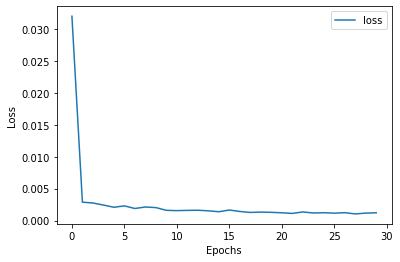

In [177]:

Total_time_training=end-start
print ('Total_time_training:',Total_time_training )


history=LSTM_trained_model2.history

losses=history['loss']
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(losses)
plt.legend(['loss'])

<Figure size 432x288 with 0 Axes>

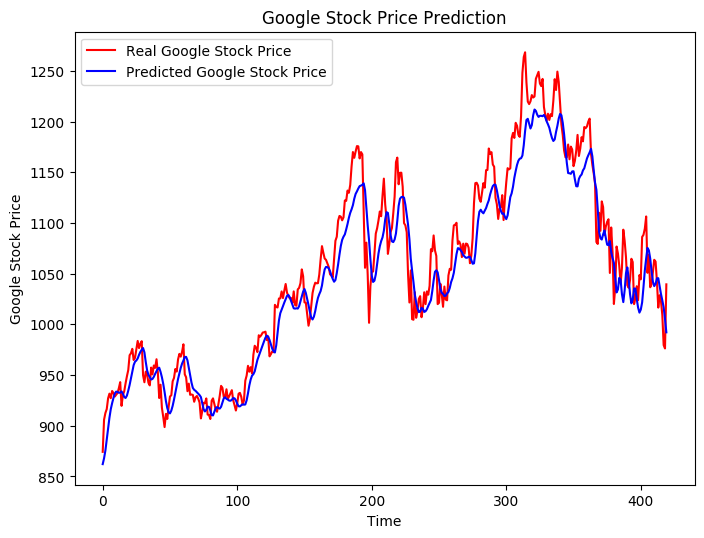

<Figure size 432x288 with 0 Axes>

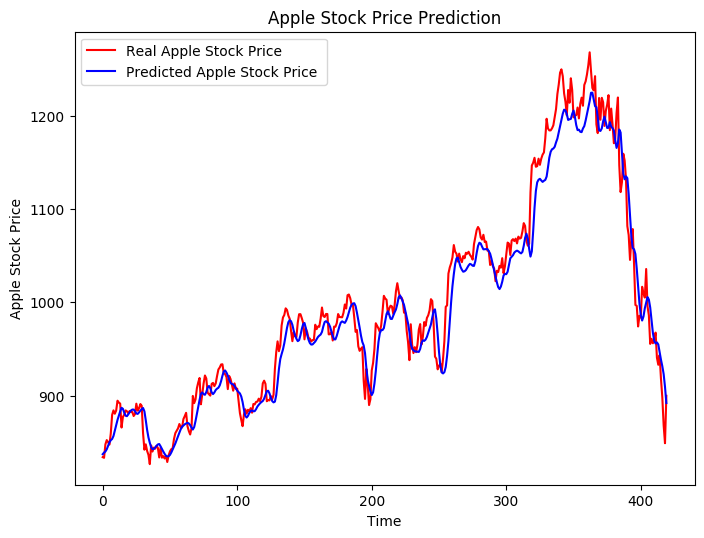

420/420 [==============================] - 5s 12ms/step


0.003006862121678534

In [178]:
predicted_stock_price = regressorLSTM2.predict(datatest)
predicted_stock_price = min_max_scaler.inverse_transform(predicted_stock_price)
real_stock_price = min_max_scaler.inverse_transform(y_test)

plt.figure()
plt.figure(figsize=(8,6),dpi=100)
plt.plot(real_stock_price[:,0],color='red', label='Real Google Stock Price ')
plt.plot(predicted_stock_price[:,0],color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()


plt.figure()
plt.figure(figsize=(8,6),dpi=100)
plt.plot(real_stock_price[:,1],color='red', label='Real Apple Stock Price ')
plt.plot(predicted_stock_price[:,1],color='blue', label='Predicted Apple Stock Price ')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()


regressorLSTM2.evaluate(datatest,y_test)

In [179]:

regressorLSTM3 = Sequential()

regressorLSTM3.add(LSTM(units = 50, return_sequences = True, input_shape = (datatrain.shape[1], 2)))
regressorLSTM3.add(Dropout(0.01))

regressorLSTM3.add(LSTM(units = 50, return_sequences = True))
regressorLSTM3.add(Dropout(0.01))

regressorLSTM3.add(LSTM(units = 50, return_sequences = True))
regressorLSTM3.add(Dropout(0.01))

regressorLSTM3.add(LSTM(units = 50))
regressorLSTM3.add(Dropout(0.01))

regressorLSTM3.add(Dense(units = 2))
from keras import optimizers
adam=optimizers.adam(lr=0.01)
regressorLSTM3.compile(optimizer = adam, loss = 'mean_squared_error')

start=datetime.datetime.now()
LSTM_trained_model3=regressorLSTM3.fit(datatrain, y_train, epochs = 30, batch_size = 32)
end=datetime.datetime.now()


Epoch 1/30
1770/1770 [==============================] - 22s 13ms/step - loss: 0.0489
Epoch 2/30
1770/1770 [==============================] - 10s 6ms/step - loss: 0.0020
Epoch 3/30
1770/1770 [==============================] - 10s 6ms/step - loss: 0.0016
Epoch 4/30
1770/1770 [==============================] - 10s 6ms/step - loss: 0.0014
Epoch 5/30
1770/1770 [==============================] - 10s 6ms/step - loss: 0.0011
Epoch 6/30
1770/1770 [==============================] - 10s 6ms/step - loss: 0.0012
Epoch 7/30
1770/1770 [==============================] - 10s 6ms/step - loss: 0.0012
Epoch 8/30
1770/1770 [==============================] - 10s 6ms/step - loss: 9.7309e-04
Epoch 9/30
1770/1770 [==============================] - 10s 6ms/step - loss: 9.6532e-04
Epoch 10/30
1770/1770 [==============================] - 10s 6ms/step - loss: 0.0011
Epoch 11/30
1770/1770 [==============================] - 10s 6ms/step - loss: 0.0013
Epoch 12/30
1770/1770 [==============================] - 10s 6ms/

Total_time_training: 0:05:24.944333


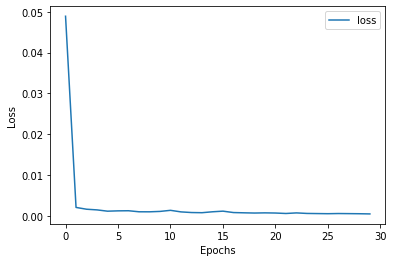

In [181]:

Total_time_training=end-start
print ('Total_time_training:',Total_time_training )


history=LSTM_trained_model3.history

losses=history['loss']
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(losses)
plt.legend(['loss'])

<Figure size 432x288 with 0 Axes>

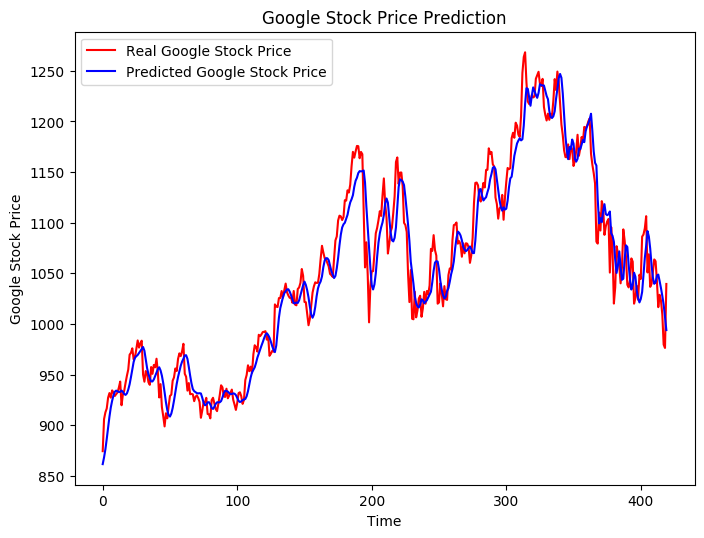

<Figure size 432x288 with 0 Axes>

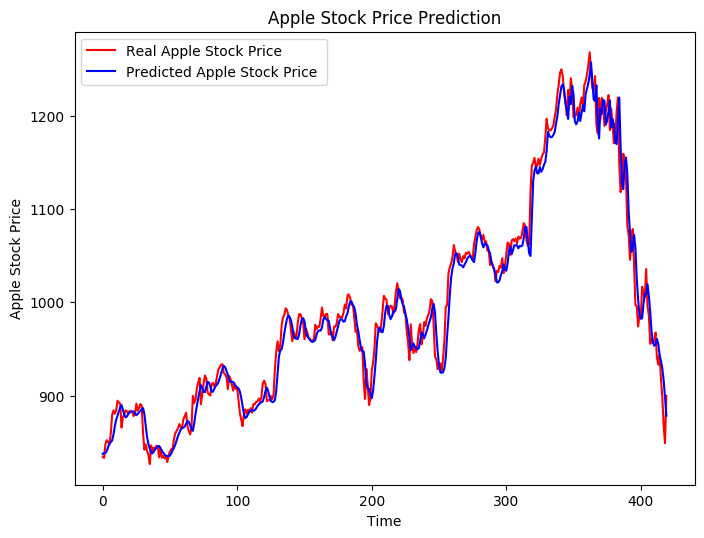

420/420 [==============================] - 6s 14ms/step


0.001962583999903429

In [187]:
predicted_stock_price = regressorLSTM3.predict(datatest)
predicted_stock_price = min_max_scaler.inverse_transform(predicted_stock_price)
real_stock_price = min_max_scaler.inverse_transform(y_test)

plt.figure()
plt.figure(figsize=(8,6),dpi=100)
plt.plot(real_stock_price[:,0],color='red', label='Real Google Stock Price ')
plt.plot(predicted_stock_price[:,0],color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()


plt.figure()
plt.figure(figsize=(8,6),dpi=100)
plt.plot(real_stock_price[:,1],color='red', label='Real Apple Stock Price ')
plt.plot(predicted_stock_price[:,1],color='blue', label='Predicted Apple Stock Price ')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()


regressorLSTM3.evaluate(datatest,y_test)

In [183]:

regressorLSTM4 = Sequential()

regressorLSTM4.add(LSTM(units = 50, return_sequences = True, input_shape = (datatrain.shape[1], 2)))

regressorLSTM4.add(LSTM(units = 50, return_sequences = True))

regressorLSTM4.add(LSTM(units = 50, return_sequences = True))

regressorLSTM4.add(LSTM(units = 50))

regressorLSTM4.add(Dense(units = 2))
from keras import optimizers
adam=optimizers.adam(lr=0.01)
regressorLSTM4.compile(optimizer = adam, loss = 'mean_squared_error')

start=datetime.datetime.now()
LSTM_trained_model4=regressorLSTM4.fit(datatrain, y_train, epochs = 30, batch_size = 32)
end=datetime.datetime.now()

Epoch 1/30
1770/1770 [==============================] - 22s 13ms/step - loss: 0.0452
Epoch 2/30
1770/1770 [==============================] - 10s 6ms/step - loss: 0.0017
Epoch 3/30
1770/1770 [==============================] - 10s 6ms/step - loss: 0.0013
Epoch 4/30
1770/1770 [==============================] - 10s 6ms/step - loss: 0.0013
Epoch 5/30
1770/1770 [==============================] - 10s 6ms/step - loss: 0.0012
Epoch 6/30
1770/1770 [==============================] - 10s 6ms/step - loss: 0.0010
Epoch 7/30
1770/1770 [==============================] - 10s 6ms/step - loss: 0.0011
Epoch 8/30
1770/1770 [==============================] - 10s 6ms/step - loss: 9.1364e-04
Epoch 9/30
1770/1770 [==============================] - 10s 6ms/step - loss: 8.5027e-04
Epoch 10/30
1770/1770 [==============================] - 10s 6ms/step - loss: 8.5287e-04
Epoch 11/30
1770/1770 [==============================] - 10s 6ms/step - loss: 7.8327e-04
Epoch 12/30
1770/1770 [==============================] - 

Total_time_training: 0:05:21.348646


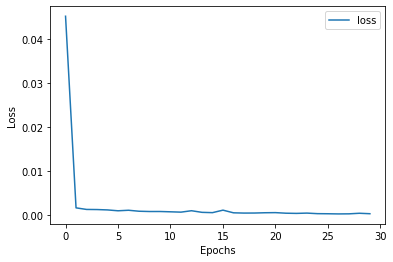

In [184]:

Total_time_training=end-start
print ('Total_time_training:',Total_time_training )



<Figure size 432x288 with 0 Axes>

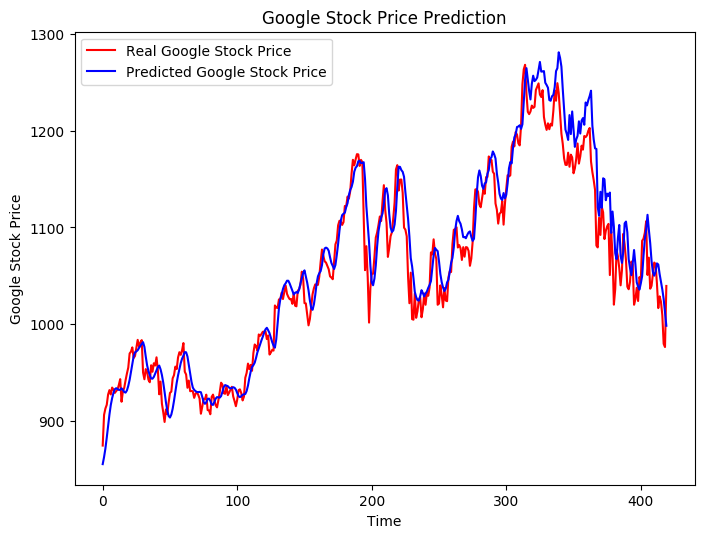

<Figure size 432x288 with 0 Axes>

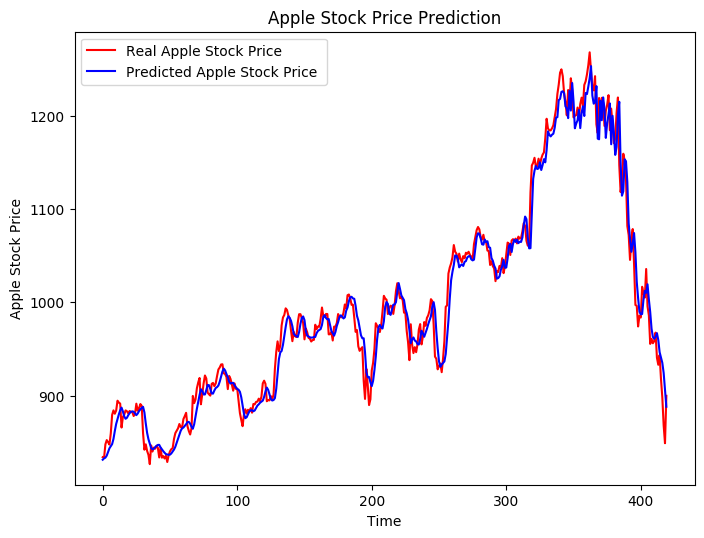

420/420 [==============================] - 6s 14ms/step


0.0023381682999786876

In [188]:
predicted_stock_price = regressorLSTM4.predict(datatest)
predicted_stock_price = min_max_scaler.inverse_transform(predicted_stock_price)
real_stock_price = min_max_scaler.inverse_transform(y_test)

plt.figure()
plt.figure(figsize=(8,6),dpi=100)
plt.plot(real_stock_price[:,0],color='red', label='Real Google Stock Price ')
plt.plot(predicted_stock_price[:,0],color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()


plt.figure()
plt.figure(figsize=(8,6),dpi=100)
plt.plot(real_stock_price[:,1],color='red', label='Real Apple Stock Price ')
plt.plot(predicted_stock_price[:,1],color='blue', label='Predicted Apple Stock Price ')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()


regressorLSTM4.evaluate(datatest,y_test)

In [189]:

regressorLSTM5 = Sequential()

regressorLSTM5.add(LSTM(units = 50, return_sequences = True, input_shape = (datatrain.shape[1], 2)))
regressorLSTM5.add(Dropout(0.5))

regressorLSTM5.add(LSTM(units = 50, return_sequences = True))
regressorLSTM5.add(Dropout(0.5))

regressorLSTM5.add(LSTM(units = 50, return_sequences = True))
regressorLSTM5.add(Dropout(0.5))

regressorLSTM5.add(LSTM(units = 50))
regressorLSTM5.add(Dropout(0.5))

regressorLSTM5.add(Dense(units = 2))
from keras import optimizers
adam=optimizers.adam(lr=0.01)
regressorLSTM5.compile(optimizer = adam, loss = 'mean_squared_error')

start=datetime.datetime.now()
LSTM_trained_model5=regressorLSTM5.fit(datatrain, y_train, epochs = 30, batch_size = 32)
end=datetime.datetime.now()

Epoch 1/30
1770/1770 [==============================] - 23s 13ms/step - loss: 0.0379
Epoch 2/30
1770/1770 [==============================] - 10s 6ms/step - loss: 0.0102
Epoch 3/30
1770/1770 [==============================] - 10s 6ms/step - loss: 0.0097
Epoch 4/30
1770/1770 [==============================] - 10s 6ms/step - loss: 0.0075
Epoch 5/30
1770/1770 [==============================] - 10s 6ms/step - loss: 0.0062
Epoch 6/30
1770/1770 [==============================] - 10s 6ms/step - loss: 0.0060
Epoch 7/30
1770/1770 [==============================] - 10s 6ms/step - loss: 0.0063
Epoch 8/30
1770/1770 [==============================] - 10s 6ms/step - loss: 0.0059
Epoch 9/30
1770/1770 [==============================] - 11s 6ms/step - loss: 0.0051
Epoch 10/30
1770/1770 [==============================] - 10s 6ms/step - loss: 0.0052
Epoch 11/30
1770/1770 [==============================] - 10s 6ms/step - loss: 0.0053
Epoch 12/30
1770/1770 [==============================] - 10s 6ms/step - l

In [190]:

Total_time_training=end-start
print ('Total_time_training:',Total_time_training )



Total_time_training: 0:05:27.655247


<Figure size 432x288 with 0 Axes>

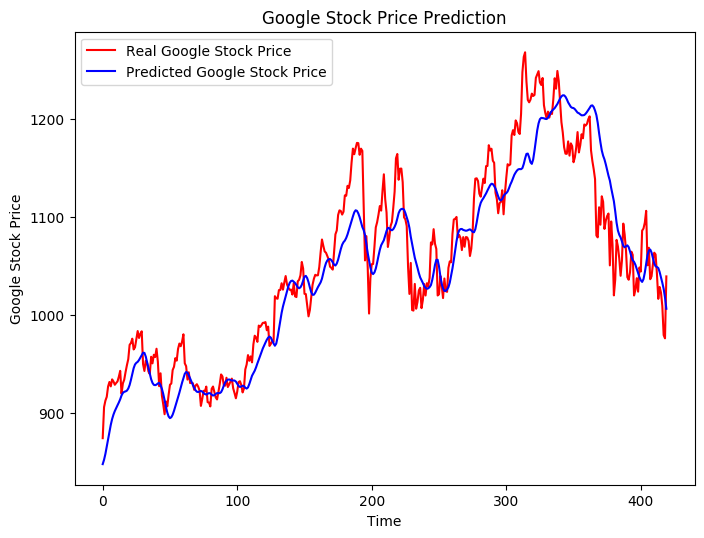

<Figure size 432x288 with 0 Axes>

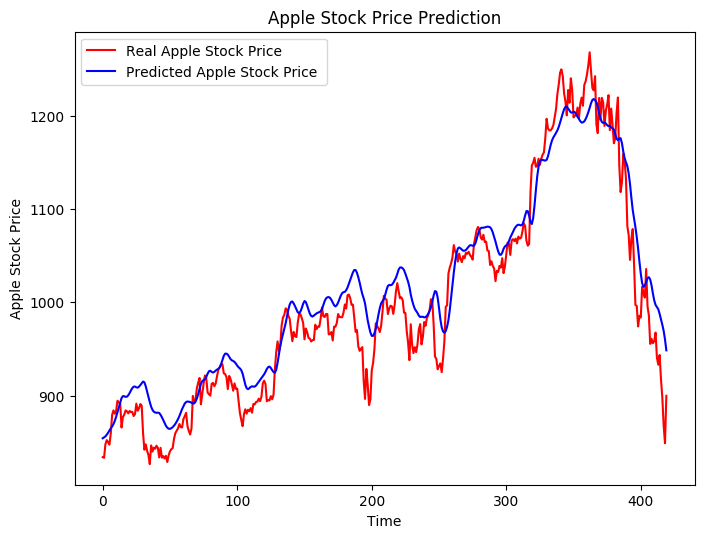

420/420 [==============================] - 6s 14ms/step


0.005577427765265817

In [191]:
predicted_stock_price = regressorLSTM5.predict(datatest)
predicted_stock_price = min_max_scaler.inverse_transform(predicted_stock_price)
real_stock_price = min_max_scaler.inverse_transform(y_test)

plt.figure()
plt.figure(figsize=(8,6),dpi=100)
plt.plot(real_stock_price[:,0],color='red', label='Real Google Stock Price ')
plt.plot(predicted_stock_price[:,0],color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()


plt.figure()
plt.figure(figsize=(8,6),dpi=100)
plt.plot(real_stock_price[:,1],color='red', label='Real Apple Stock Price ')
plt.plot(predicted_stock_price[:,1],color='blue', label='Predicted Apple Stock Price ')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()


regressorLSTM5.evaluate(datatest,y_test)

In [192]:
# The RNN architecture
from keras.layers import SimpleRNN as rnn
regressorRNN2 = Sequential()
# First RNN layer with Dropout regularisation
regressorRNN2.add(rnn(units=50, activation='tanh', return_sequences=True, input_shape=(datatrain.shape[1], 2)))
regressorRNN2.add(Dropout(0.1))
# Second RNN layer
regressorRNN2.add(rnn(units=50, return_sequences=True))
regressorRNN2.add(Dropout(0.1))
# Third RNN layer
regressorRNN2.add(rnn(units=50, return_sequences=True))
regressorRNN2.add(Dropout(0.1))
# Fourth RNN layer
regressorRNN2.add(rnn(units=50))
regressorRNN2.add(Dropout(0.1))
# The output layer
regressorRNN2.add(Dense(units=2))
from keras import optimizers
adam=optimizers.adam(lr=0.01)
# Compiling the RNN
regressorRNN2.compile(optimizer=adam,loss='mean_squared_error')
# Fitting to the training set
RNN_trained_model2=regressorRNN2.fit(datatrain, y_train, epochs = 30, batch_size = 32)

Epoch 1/30
1770/1770 [==============================] - 16s 9ms/step - loss: 0.2748
Epoch 2/30
1770/1770 [==============================] - 4s 2ms/step - loss: 0.1118
Epoch 3/30
1770/1770 [==============================] - 4s 2ms/step - loss: 0.0563
Epoch 4/30
1770/1770 [==============================] - 4s 2ms/step - loss: 0.0322
Epoch 5/30
1770/1770 [==============================] - 4s 2ms/step - loss: 0.0227
Epoch 6/30
1770/1770 [==============================] - 4s 2ms/step - loss: 0.0149
Epoch 7/30
1770/1770 [==============================] - 4s 2ms/step - loss: 0.0115
Epoch 8/30
1770/1770 [==============================] - 4s 2ms/step - loss: 0.0113
Epoch 9/30
1770/1770 [==============================] - 4s 2ms/step - loss: 0.0098
Epoch 10/30
1770/1770 [==============================] - 4s 2ms/step - loss: 0.0098
Epoch 11/30
1770/1770 [==============================] - 4s 2ms/step - loss: 0.0099
Epoch 12/30
1770/1770 [==============================] - 4s 2ms/step - loss: 0.0108


In [193]:

Total_time_training=end-start
print ('Total_time_training:',Total_time_training )


Total_time_training: 0:05:27.655247


<Figure size 432x288 with 0 Axes>

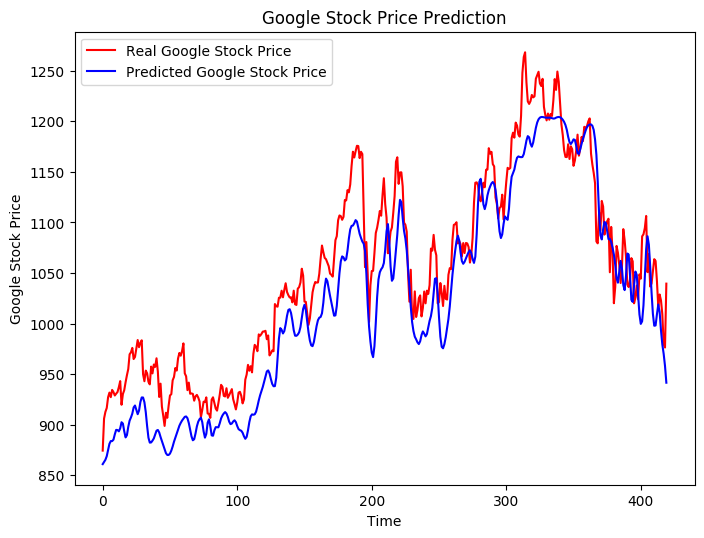

<Figure size 432x288 with 0 Axes>

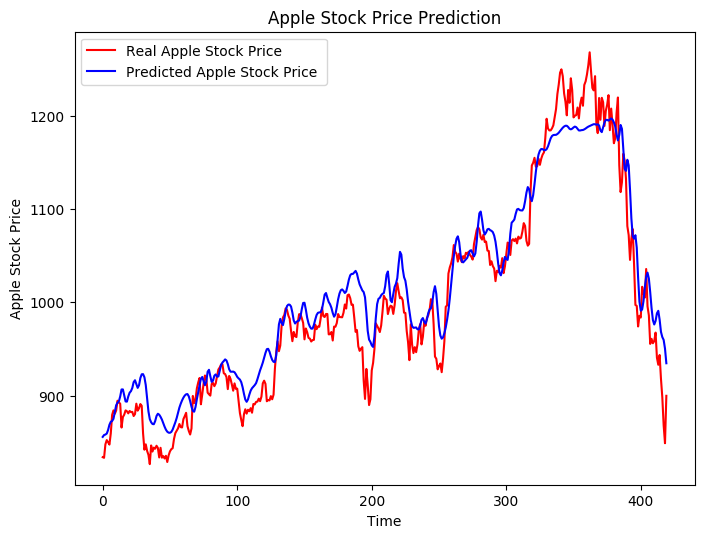

420/420 [==============================] - 6s 14ms/step


0.006831447797871771

In [194]:
predicted_stock_price = regressorRNN2.predict(datatest)
predicted_stock_price = min_max_scaler.inverse_transform(predicted_stock_price)
real_stock_price = min_max_scaler.inverse_transform(y_test)

plt.figure()
plt.figure(figsize=(8,6),dpi=100)
plt.plot(real_stock_price[:,0],color='red', label='Real Google Stock Price ')
plt.plot(predicted_stock_price[:,0],color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()


plt.figure()
plt.figure(figsize=(8,6),dpi=100)
plt.plot(real_stock_price[:,1],color='red', label='Real Apple Stock Price ')
plt.plot(predicted_stock_price[:,1],color='blue', label='Predicted Apple Stock Price ')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()


regressorRNN2.evaluate(datatest,y_test)

In [195]:
# The RNN architecture
from keras.layers import SimpleRNN as rnn
regressorRNN3 = Sequential()
# First RNN layer with Dropout regularisation
regressorRNN3.add(rnn(units=50, activation='tanh', return_sequences=True, input_shape=(datatrain.shape[1], 2)))
regressorRNN3.add(Dropout(0.01))
# Second RNN layer
regressorRNN3.add(rnn(units=50, return_sequences=True))
regressorRNN3.add(Dropout(0.01))
# Third RNN layer
regressorRNN3.add(rnn(units=50, return_sequences=True))
regressorRNN3.add(Dropout(0.01))
# Fourth RNN layer
regressorRNN3.add(rnn(units=50))
regressorRNN3.add(Dropout(0.01))
# The output layer
regressorRNN3.add(Dense(units=2))
from keras import optimizers
adam=optimizers.adam(lr=0.01)
# Compiling the RNN
regressorRNN3.compile(optimizer=adam,loss='mean_squared_error')
# Fitting to the training set
RNN_trained_model3=regressorRNN3.fit(datatrain, y_train, epochs = 30, batch_size = 32)

Epoch 1/30
1770/1770 [==============================] - 16s 9ms/step - loss: 0.1332
Epoch 2/30
1770/1770 [==============================] - 4s 2ms/step - loss: 0.0701
Epoch 3/30
1770/1770 [==============================] - 4s 2ms/step - loss: 0.0756
Epoch 4/30
1770/1770 [==============================] - 4s 2ms/step - loss: 0.0862
Epoch 5/30
1770/1770 [==============================] - 4s 2ms/step - loss: 0.0864
Epoch 6/30
1770/1770 [==============================] - 4s 2ms/step - loss: 0.0864
Epoch 7/30
1770/1770 [==============================] - 4s 2ms/step - loss: 0.0848
Epoch 8/30
1770/1770 [==============================] - 4s 2ms/step - loss: 0.0802
Epoch 9/30
1770/1770 [==============================] - 4s 2ms/step - loss: 0.0494
Epoch 10/30
1770/1770 [==============================] - 4s 2ms/step - loss: 0.0206
Epoch 11/30
1770/1770 [==============================] - 4s 2ms/step - loss: 0.0229
Epoch 12/30
1770/1770 [==============================] - 4s 2ms/step - loss: 0.0164


In [196]:

Total_time_training=end-start
print ('Total_time_training:',Total_time_training )


Total_time_training: 0:05:27.655247


<Figure size 432x288 with 0 Axes>

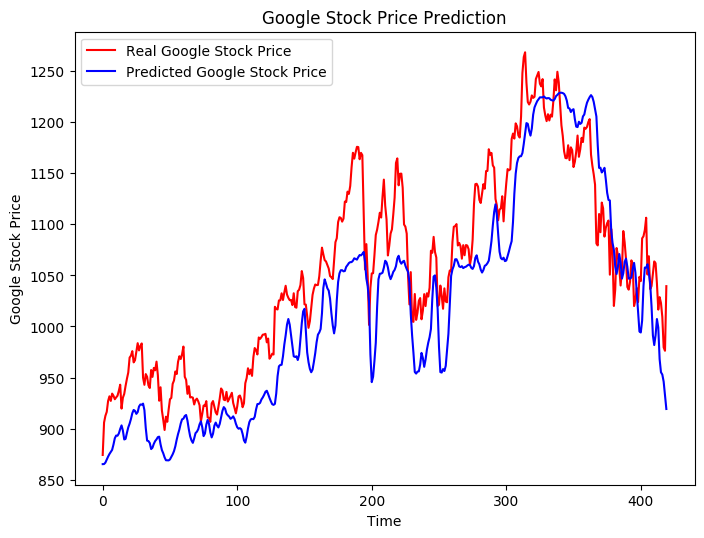

<Figure size 432x288 with 0 Axes>

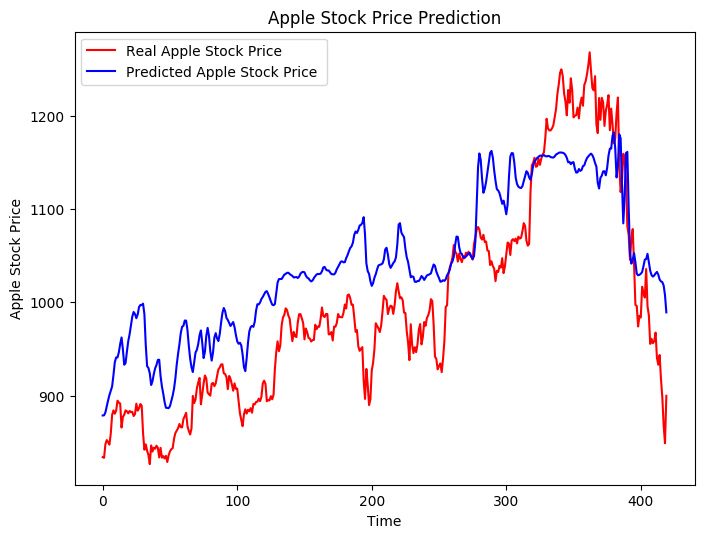

420/420 [==============================] - 6s 14ms/step


0.018626269769100916

In [197]:
predicted_stock_price = regressorRNN3.predict(datatest)
predicted_stock_price = min_max_scaler.inverse_transform(predicted_stock_price)
real_stock_price = min_max_scaler.inverse_transform(y_test)

plt.figure()
plt.figure(figsize=(8,6),dpi=100)
plt.plot(real_stock_price[:,0],color='red', label='Real Google Stock Price ')
plt.plot(predicted_stock_price[:,0],color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()


plt.figure()
plt.figure(figsize=(8,6),dpi=100)
plt.plot(real_stock_price[:,1],color='red', label='Real Apple Stock Price ')
plt.plot(predicted_stock_price[:,1],color='blue', label='Predicted Apple Stock Price ')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()


regressorRNN3.evaluate(datatest,y_test)

In [198]:
# The RNN architecture
from keras.layers import SimpleRNN as rnn
regressorRNN4 = Sequential()
# First RNN layer with Dropout regularisation
regressorRNN4.add(rnn(units=50, activation='tanh', return_sequences=True, input_shape=(datatrain.shape[1], 2)))
regressorRNN4.add(Dropout(0.5))
# Second RNN layer
regressorRNN4.add(rnn(units=50, return_sequences=True))
regressorRNN4.add(Dropout(0.5))
# Third RNN layer
regressorRNN4.add(rnn(units=50, return_sequences=True))
regressorRNN4.add(Dropout(0.5))
# Fourth RNN layer
regressorRNN4.add(rnn(units=50))
regressorRNN4.add(Dropout(0.5))
# The output layer
regressorRNN4.add(Dense(units=2))
from keras import optimizers
adam=optimizers.adam(lr=0.5)
# Compiling the RNN
regressorRNN4.compile(optimizer=adam,loss='mean_squared_error')
# Fitting to the training set
RNN_trained_model4=regressorRNN4.fit(datatrain, y_train, epochs = 30, batch_size = 32)

Epoch 1/30
1770/1770 [==============================] - 16s 9ms/step - loss: 10.3433
Epoch 2/30
1770/1770 [==============================] - 4s 2ms/step - loss: 1.4887
Epoch 3/30
1770/1770 [==============================] - 4s 2ms/step - loss: 1.4817
Epoch 4/30
1770/1770 [==============================] - 4s 2ms/step - loss: 1.9090
Epoch 5/30
1770/1770 [==============================] - 4s 2ms/step - loss: 2.8056
Epoch 6/30
1770/1770 [==============================] - 4s 2ms/step - loss: 3.4394
Epoch 7/30
1770/1770 [==============================] - 4s 2ms/step - loss: 4.7420
Epoch 8/30
1770/1770 [==============================] - 4s 2ms/step - loss: 2.9651
Epoch 9/30
1770/1770 [==============================] - 4s 2ms/step - loss: 2.1613
Epoch 10/30
1770/1770 [==============================] - 4s 2ms/step - loss: 2.7753
Epoch 11/30
1770/1770 [==============================] - 4s 2ms/step - loss: 0.8717
Epoch 12/30
1770/1770 [==============================] - 4s 2ms/step - loss: 0.7305

In [199]:

Total_time_training=end-start
print ('Total_time_training:',Total_time_training )

Total_time_training: 0:05:27.655247


<Figure size 432x288 with 0 Axes>

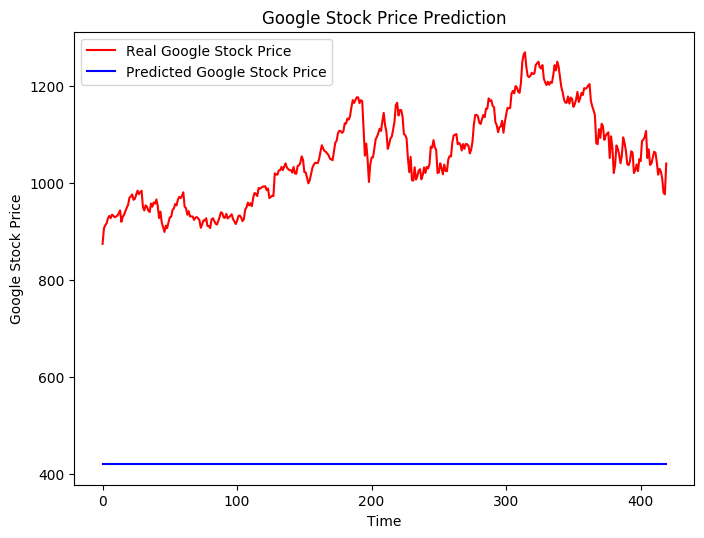

<Figure size 432x288 with 0 Axes>

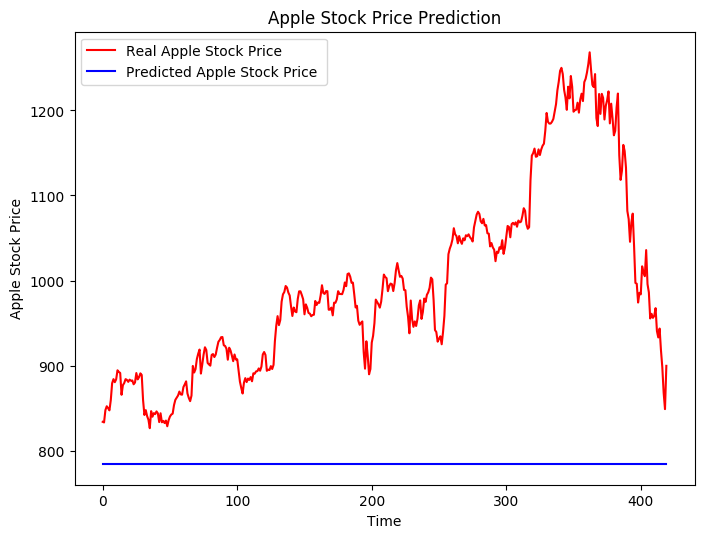

420/420 [==============================] - 6s 14ms/step


1.1316219613665626

In [200]:
predicted_stock_price = regressorRNN4.predict(datatest)
predicted_stock_price = min_max_scaler.inverse_transform(predicted_stock_price)
real_stock_price = min_max_scaler.inverse_transform(y_test)

plt.figure()
plt.figure(figsize=(8,6),dpi=100)
plt.plot(real_stock_price[:,0],color='red', label='Real Google Stock Price ')
plt.plot(predicted_stock_price[:,0],color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()


plt.figure()
plt.figure(figsize=(8,6),dpi=100)
plt.plot(real_stock_price[:,1],color='red', label='Real Apple Stock Price ')
plt.plot(predicted_stock_price[:,1],color='blue', label='Predicted Apple Stock Price ')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()


regressorRNN4.evaluate(datatest,y_test)

In [201]:
from keras.layers import GRU
regressorGRU6 = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU6.add(GRU(units=50, return_sequences=True, input_shape=(datatrain.shape[1], 2)))
regressorGRU6.add(Dropout(0.01))
# Second GRU layer
regressorGRU6.add(GRU(units=50, return_sequences=True))
regressorGRU6.add(Dropout(0.01))
# Third GRU layer
regressorGRU6.add(GRU(units=50, return_sequences=True))
regressorGRU6.add(Dropout(0.01))
# Fourth GRU layer
regressorGRU6.add(GRU(units=50))
regressorGRU6.add(Dropout(0.01))
# The output layer
regressorGRU6.add(Dense(units=2))
from keras import optimizers
adam=optimizers.adam(lr=0.01)
# Compiling the RNN
regressorGRU6.compile(optimizer=adam,loss='mean_squared_error')
# Fitting to the training set

start=datetime.datetime.now()
GRU_trained_model6=regressorGRU6.fit(datatrain, y_train, epochs = 30, batch_size = 32)
end=datetime.datetime.now()

Epoch 1/30
1770/1770 [==============================] - 23s 13ms/step - loss: 0.0151
Epoch 2/30
1770/1770 [==============================] - 9s 5ms/step - loss: 9.9608e-04
Epoch 3/30
1770/1770 [==============================] - 9s 5ms/step - loss: 7.5874e-04
Epoch 4/30
1770/1770 [==============================] - 9s 5ms/step - loss: 8.8338e-04
Epoch 5/30
1770/1770 [==============================] - 9s 5ms/step - loss: 6.1817e-04
Epoch 6/30
1770/1770 [==============================] - 9s 5ms/step - loss: 6.9897e-04
Epoch 7/30
1770/1770 [==============================] - 9s 5ms/step - loss: 6.7657e-04
Epoch 8/30
1770/1770 [==============================] - 9s 5ms/step - loss: 5.7827e-04
Epoch 9/30
1770/1770 [==============================] - 9s 5ms/step - loss: 4.9432e-04
Epoch 10/30
1770/1770 [==============================] - 9s 5ms/step - loss: 4.6950e-04
Epoch 11/30
1770/1770 [==============================] - 9s 5ms/step - loss: 5.8115e-04
Epoch 12/30
1770/1770 [====================

In [202]:

Total_time_training=end-start
print ('Total_time_training:',Total_time_training )

Total_time_training: 0:04:46.434231


<Figure size 432x288 with 0 Axes>

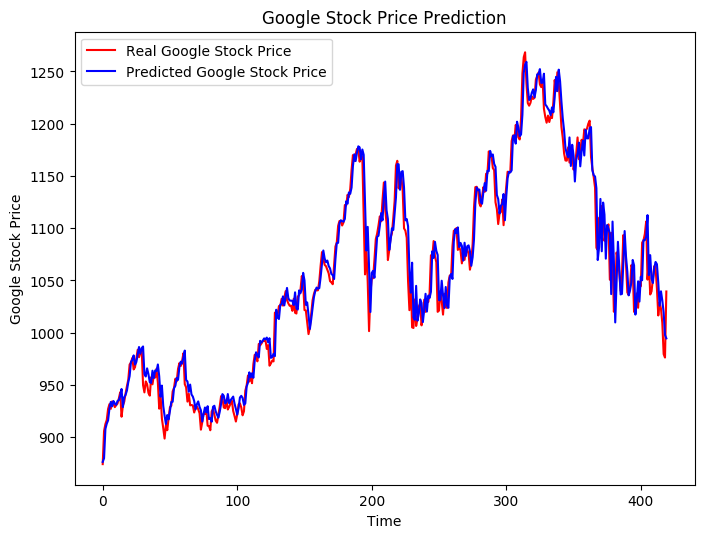

<Figure size 432x288 with 0 Axes>

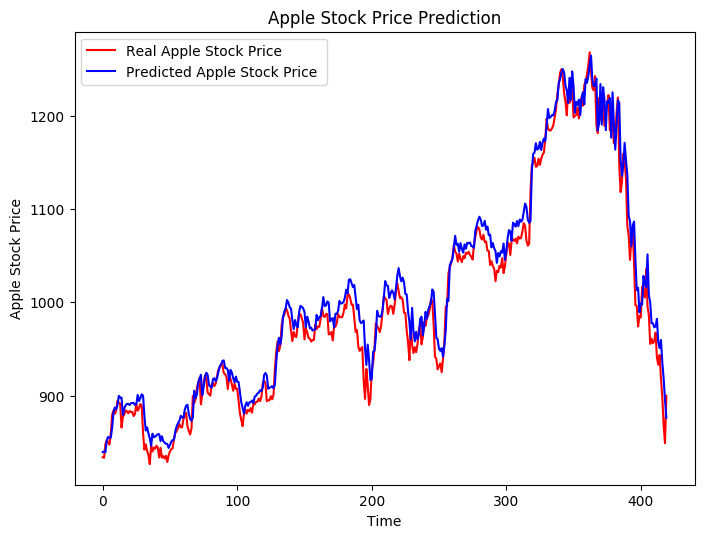

420/420 [==============================] - 7s 16ms/step


0.00160522512825472

In [203]:
predicted_stock_price = regressorGRU6.predict(datatest)
predicted_stock_price = min_max_scaler.inverse_transform(predicted_stock_price)
real_stock_price = min_max_scaler.inverse_transform(y_test)

plt.figure()
plt.figure(figsize=(8,6),dpi=100)
plt.plot(real_stock_price[:,0],color='red', label='Real Google Stock Price ')
plt.plot(predicted_stock_price[:,0],color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()


plt.figure()
plt.figure(figsize=(8,6),dpi=100)
plt.plot(real_stock_price[:,1],color='red', label='Real Apple Stock Price ')
plt.plot(predicted_stock_price[:,1],color='blue', label='Predicted Apple Stock Price ')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()


regressorGRU6.evaluate(datatest,y_test)

In [0]:
predicted_stock_priceGRU5 = regressorGRU5.predict(datatest)
predicted_stock_priceGRU2 = regressorGRU2.predict(datatest)
predicted_stock_priceGRU4 = regressorGRU4.predict(datatest)

predicted_stock_priceGRU2 = min_max_scaler.inverse_transform(predicted_stock_priceGRU2)
predicted_stock_priceGRU4 = min_max_scaler.inverse_transform(predicted_stock_priceGRU4)
predicted_stock_priceGRU5 = min_max_scaler.inverse_transform(predicted_stock_priceGRU5)

real_stock_price = min_max_scaler.inverse_transform(y_test)

<Figure size 432x288 with 0 Axes>

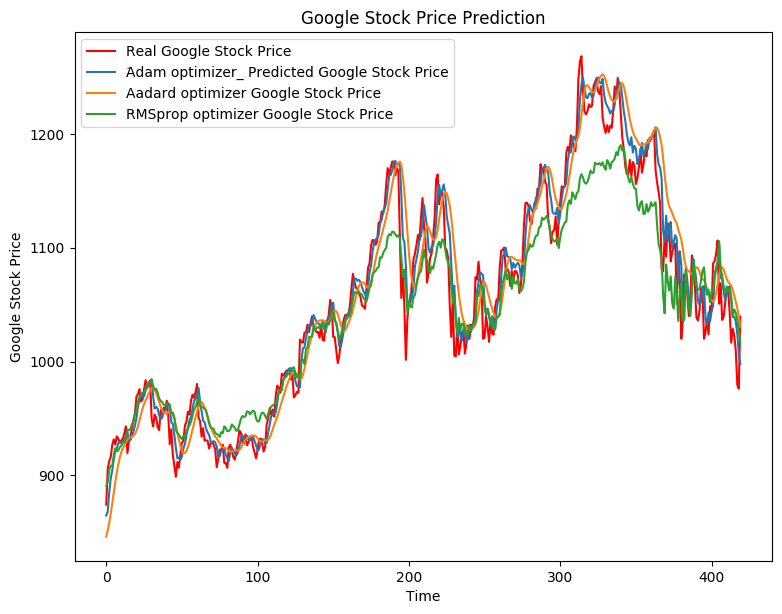

In [208]:
plt.figure()
plt.figure(figsize=(9,7),dpi=100)
plt.plot(real_stock_price[:,0],color='red', label='Real Google Stock Price ')
plt.plot(predicted_stock_priceGRU2[:,0], label='َAdam optimizer_ Predicted Google Stock Price')
plt.plot(predicted_stock_priceGRU4[:,0], label='Aadard optimizer Google Stock Price')
plt.plot(predicted_stock_priceGRU5[:,0], label='RMSprop optimizer Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

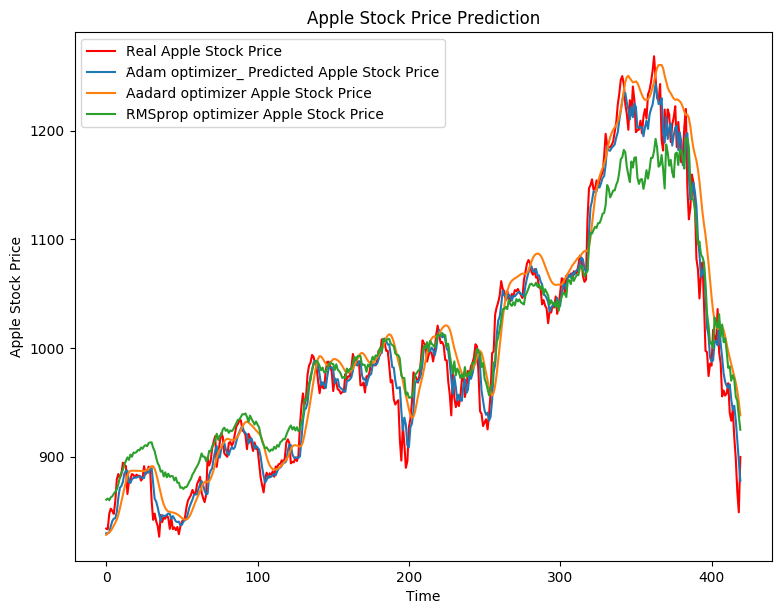

In [209]:
plt.figure()
plt.figure(figsize=(9,7),dpi=100)
plt.plot(real_stock_price[:,1],color='red', label='Real Apple Stock Price ')
plt.plot(predicted_stock_priceGRU2[:,1], label='َAdam optimizer_ Predicted Apple Stock Price')
plt.plot(predicted_stock_priceGRU4[:,1], label='Aadard optimizer Apple Stock Price')
plt.plot(predicted_stock_priceGRU5[:,1], label='RMSprop optimizer Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

In [210]:
print(regressorGRU2.evaluate(datatest,y_test))
print(regressorGRU4.evaluate(datatest,y_test))
print(regressorGRU5.evaluate(datatest,y_test))


420/420 [==============================] - 1s 2ms/step
0.0015844204352192936
420/420 [==============================] - 1s 2ms/step
0.004693527732576643
420/420 [==============================] - 7s 16ms/step
0.004763067788666203


In [211]:
from keras.layers import GRU
regressorGRU7 = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU7.add(GRU(units=50, return_sequences=True, input_shape=(datatrain.shape[1], 2)))
regressorGRU7.add(Dropout(0.5))
# Second GRU layer
regressorGRU7.add(GRU(units=50, return_sequences=True))
regressorGRU7.add(Dropout(0.5))
# Third GRU layer
regressorGRU7.add(GRU(units=50, return_sequences=True))
regressorGRU7.add(Dropout(0.5))
# Fourth GRU layer
regressorGRU7.add(GRU(units=50))
regressorGRU7.add(Dropout(0.5))
# The output layer
regressorGRU7.add(Dense(units=2))
from keras import optimizers
adam=optimizers.adam(lr=0.01)
# Compiling the RNN
regressorGRU7.compile(optimizer=adam,loss='mean_squared_error')
# Fitting to the training set

start=datetime.datetime.now()
GRU_trained_model7=regressorGRU7.fit(datatrain, y_train, epochs = 30, batch_size = 32)
end=datetime.datetime.now()

Epoch 1/30
1770/1770 [==============================] - 24s 14ms/step - loss: 0.0353
Epoch 2/30
1770/1770 [==============================] - 9s 5ms/step - loss: 0.0095
Epoch 3/30
1770/1770 [==============================] - 9s 5ms/step - loss: 0.0094
Epoch 4/30
1770/1770 [==============================] - 9s 5ms/step - loss: 0.0073
Epoch 5/30
1770/1770 [==============================] - 9s 5ms/step - loss: 0.0068
Epoch 6/30
1770/1770 [==============================] - 9s 5ms/step - loss: 0.0056
Epoch 7/30
1770/1770 [==============================] - 9s 5ms/step - loss: 0.0055
Epoch 8/30
1770/1770 [==============================] - 9s 5ms/step - loss: 0.0049
Epoch 9/30
1770/1770 [==============================] - 9s 5ms/step - loss: 0.0054
Epoch 10/30
1770/1770 [==============================] - 9s 5ms/step - loss: 0.0064
Epoch 11/30
1770/1770 [==============================] - 9s 5ms/step - loss: 0.0053
Epoch 12/30
1770/1770 [==============================] - 9s 5ms/step - loss: 0.0049

In [212]:
from keras.layers import GRU
regressorGRU8 = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU8.add(GRU(units=50, return_sequences=True, input_shape=(datatrain.shape[1], 2)))
regressorGRU8.add(Dropout(0.1))
# Second GRU layer
regressorGRU8.add(GRU(units=50, return_sequences=True))
regressorGRU8.add(Dropout(0.1))
# Third GRU layer
regressorGRU8.add(GRU(units=50, return_sequences=True))
regressorGRU8.add(Dropout(0.1))
# Fourth GRU layer
regressorGRU8.add(GRU(units=50))
regressorGRU8.add(Dropout(0.1))
# The output layer
regressorGRU8.add(Dense(units=2))
from keras import optimizers
adam=optimizers.adam(lr=0.01)
# Compiling the RNN
regressorGRU8.compile(optimizer=adam,loss='mean_squared_error')
# Fitting to the training set

start=datetime.datetime.now()
GRU_trained_model8=regressorGRU8.fit(datatrain, y_train, epochs = 30, batch_size = 32)
end=datetime.datetime.now()

Epoch 1/30
1770/1770 [==============================] - 25s 14ms/step - loss: 0.0236
Epoch 2/30
1770/1770 [==============================] - 9s 5ms/step - loss: 0.0023
Epoch 3/30
1770/1770 [==============================] - 9s 5ms/step - loss: 0.0020
Epoch 4/30
1770/1770 [==============================] - 9s 5ms/step - loss: 0.0018
Epoch 5/30
1770/1770 [==============================] - 9s 5ms/step - loss: 0.0018
Epoch 6/30
1770/1770 [==============================] - 9s 5ms/step - loss: 0.0015
Epoch 7/30
1770/1770 [==============================] - 9s 5ms/step - loss: 0.0017
Epoch 8/30
1770/1770 [==============================] - 9s 5ms/step - loss: 0.0014
Epoch 9/30
1770/1770 [==============================] - 9s 5ms/step - loss: 0.0014
Epoch 10/30
1770/1770 [==============================] - 9s 5ms/step - loss: 0.0011
Epoch 11/30
1770/1770 [==============================] - 9s 5ms/step - loss: 0.0013
Epoch 12/30
1770/1770 [==============================] - 9s 5ms/step - loss: 0.0012

In [0]:
predicted_stock_priceRNN = regressorRNN.predict(datatest)
predicted_stock_priceRNN2 = regressorRNN2.predict(datatest)
predicted_stock_priceRNN3 = regressorRNN3.predict(datatest)
predicted_stock_priceRNN4 = regressorRNN4.predict(datatest)

predicted_stock_priceRNN = min_max_scaler.inverse_transform(predicted_stock_priceRNN)
predicted_stock_priceRNN2 = min_max_scaler.inverse_transform(predicted_stock_priceRNN2)
predicted_stock_priceRNN3 = min_max_scaler.inverse_transform(predicted_stock_priceRNN3)
predicted_stock_priceRNN4 = min_max_scaler.inverse_transform(predicted_stock_priceRNN4)

real_stock_price = min_max_scaler.inverse_transform(y_test)

<Figure size 432x288 with 0 Axes>

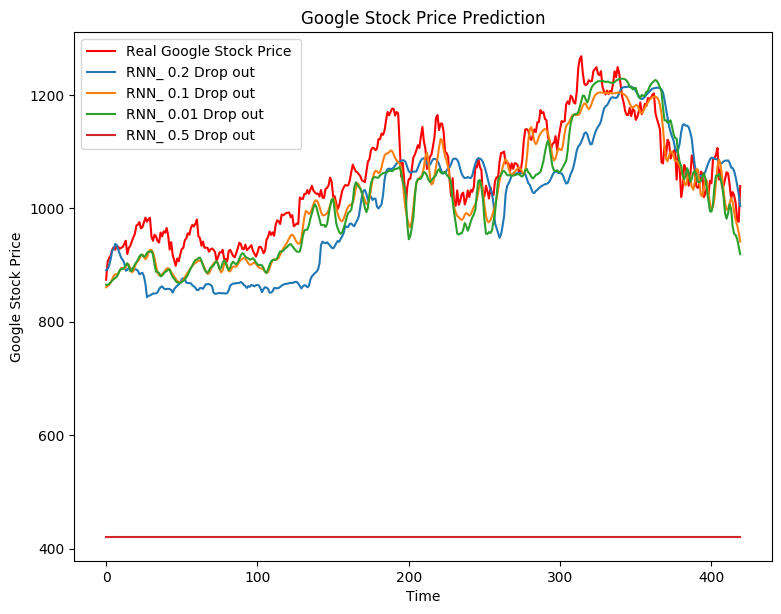

<Figure size 432x288 with 0 Axes>

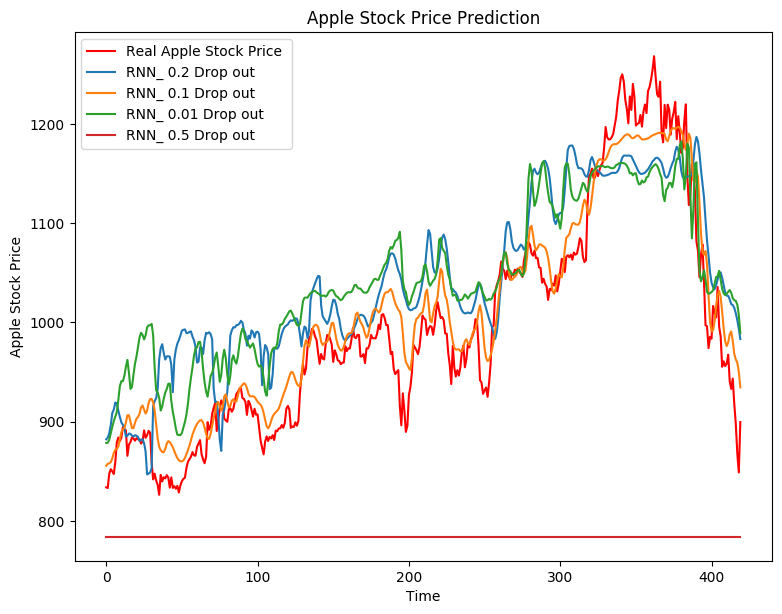

In [218]:
plt.figure()
plt.figure(figsize=(9,7),dpi=100)
plt.plot(real_stock_price[:,0],color='red', label='Real Google Stock Price ')
plt.plot(predicted_stock_priceRNN[:,0], label='َRNN_ 0.2 Drop out')
plt.plot(predicted_stock_priceRNN2[:,0], label='RNN_ 0.1 Drop out ')
plt.plot(predicted_stock_priceRNN3[:,0], label='RNN_ 0.01 Drop out ')
plt.plot(predicted_stock_priceRNN4[:,0], label='RNN_ 0.5 Drop out ')

plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()



plt.figure()
plt.figure(figsize=(9,7),dpi=100)
plt.plot(real_stock_price[:,1],color='red', label='Real Apple Stock Price ')
plt.plot(predicted_stock_priceRNN[:,1], label='َRNN_ 0.2 Drop out')
plt.plot(predicted_stock_priceRNN2[:,1], label='RNN_ 0.1 Drop out ')
plt.plot(predicted_stock_priceRNN3[:,1], label='RNN_ 0.01 Drop out ')
plt.plot(predicted_stock_priceRNN4[:,1], label='RNN_ 0.5 Drop out ')

plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

In [0]:
predicted_stock_priceGRU = regressorGRU.predict(datatest)
predicted_stock_priceGRU6 = regressorGRU6.predict(datatest)
predicted_stock_priceGRU7 = regressorGRU7.predict(datatest)
predicted_stock_priceGRU8 = regressorGRU8.predict(datatest)

predicted_stock_priceGRU = min_max_scaler.inverse_transform(predicted_stock_priceGRU)
predicted_stock_priceGRU6 = min_max_scaler.inverse_transform(predicted_stock_priceGRU6)
predicted_stock_priceGRU7 = min_max_scaler.inverse_transform(predicted_stock_priceGRU7)
predicted_stock_priceGRU8 = min_max_scaler.inverse_transform(predicted_stock_priceGRU8)

real_stock_price = min_max_scaler.inverse_transform(y_test)

<Figure size 432x288 with 0 Axes>

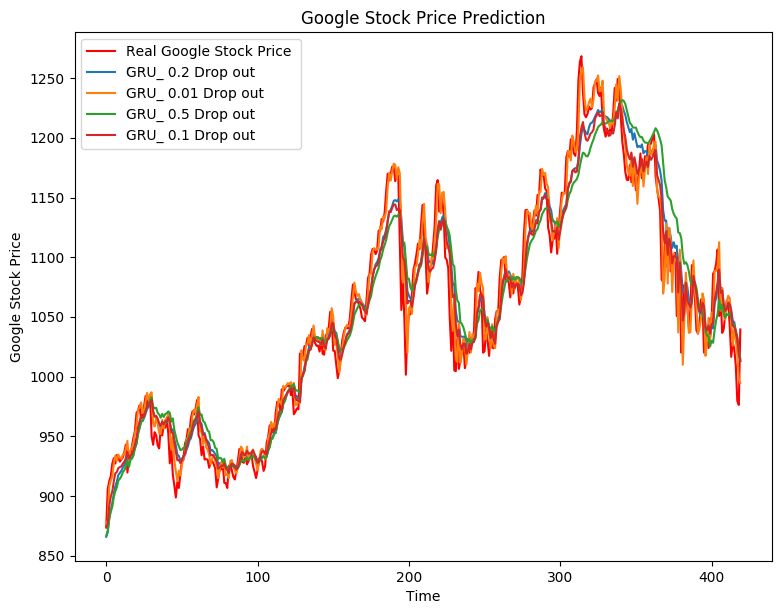

<Figure size 432x288 with 0 Axes>

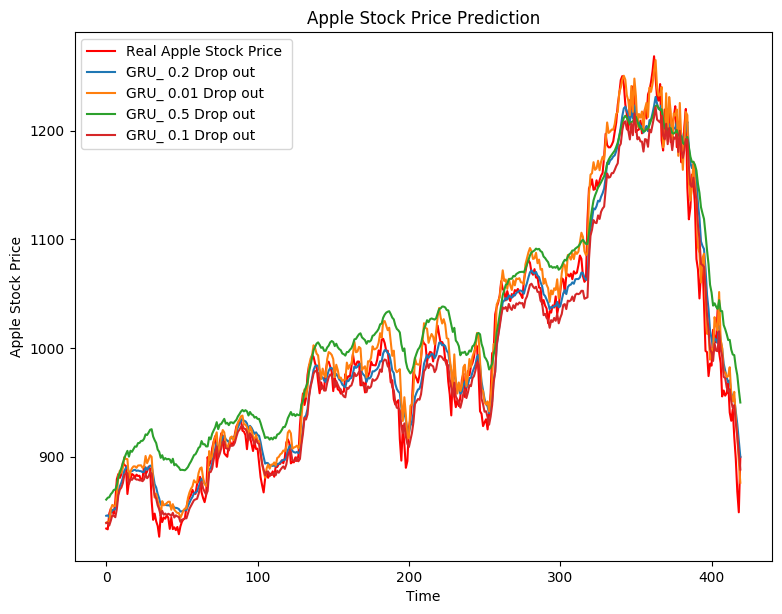

In [220]:
plt.figure()
plt.figure(figsize=(9,7),dpi=100)
plt.plot(real_stock_price[:,0],color='red', label='Real Google Stock Price ')
plt.plot(predicted_stock_priceGRU[:,0], label='َGRU_ 0.2 Drop out')
plt.plot(predicted_stock_priceGRU6[:,0], label='GRU_ 0.01 Drop out ')
plt.plot(predicted_stock_priceGRU7[:,0], label='GRU_ 0.5 Drop out ')
plt.plot(predicted_stock_priceGRU8[:,0], label='GRU_ 0.1 Drop out ')

plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()



plt.figure()
plt.figure(figsize=(9,7),dpi=100)
plt.plot(real_stock_price[:,1],color='red', label='Real Apple Stock Price ')
plt.plot(predicted_stock_priceGRU[:,1], label='َGRU_ 0.2 Drop out')
plt.plot(predicted_stock_priceGRU6[:,1], label='GRU_ 0.01 Drop out ')
plt.plot(predicted_stock_priceGRU7[:,1], label='GRU_ 0.5 Drop out ')
plt.plot(predicted_stock_priceGRU8[:,1], label='GRU_ 0.1 Drop out ')

plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

In [0]:
predicted_stock_priceLSTM = regressorLSTM.predict(datatest)
predicted_stock_priceLSTM2 = regressorLSTM2.predict(datatest)
predicted_stock_priceLSTM3 = regressorLSTM3.predict(datatest)
predicted_stock_priceLSTM5 = regressorLSTM5.predict(datatest)

predicted_stock_priceLSTM = min_max_scaler.inverse_transform(predicted_stock_priceLSTM)
predicted_stock_priceLSTM2 = min_max_scaler.inverse_transform(predicted_stock_priceLSTM2)
predicted_stock_priceLSTM3 = min_max_scaler.inverse_transform(predicted_stock_priceLSTM3)
predicted_stock_priceLSTM5 = min_max_scaler.inverse_transform(predicted_stock_priceLSTM5)

real_stock_price = min_max_scaler.inverse_transform(y_test)

<Figure size 432x288 with 0 Axes>

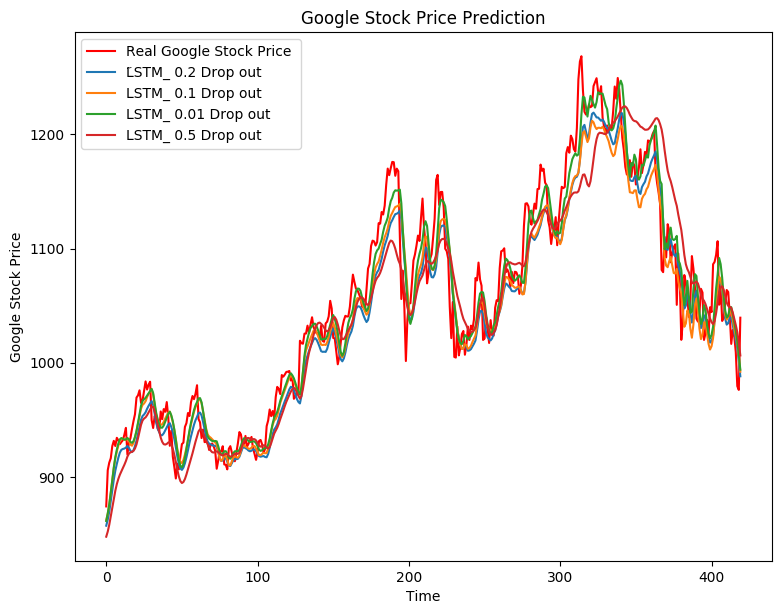

<Figure size 432x288 with 0 Axes>

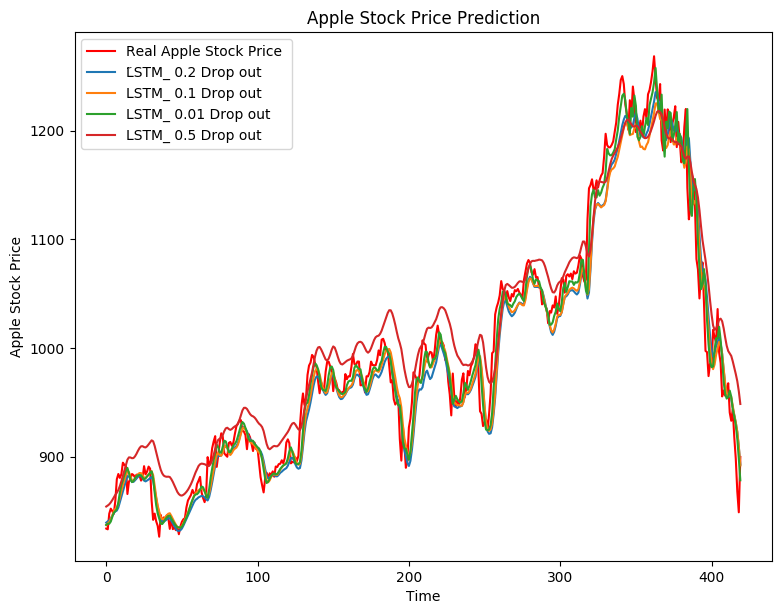

In [222]:
plt.figure()
plt.figure(figsize=(9,7),dpi=100)
plt.plot(real_stock_price[:,0],color='red', label='Real Google Stock Price ')
plt.plot(predicted_stock_priceLSTM[:,0], label='َLSTM_ 0.2 Drop out')
plt.plot(predicted_stock_priceLSTM2[:,0], label='LSTM_ 0.1 Drop out ')
plt.plot(predicted_stock_priceLSTM3[:,0], label='LSTM_ 0.01 Drop out ')
plt.plot(predicted_stock_priceLSTM5[:,0], label='LSTM_ 0.5 Drop out ')

plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()



plt.figure()
plt.figure(figsize=(9,7),dpi=100)
plt.plot(real_stock_price[:,1],color='red', label='Real Apple Stock Price ')
plt.plot(predicted_stock_priceLSTM[:,1], label='َLSTM_ 0.2 Drop out')
plt.plot(predicted_stock_priceLSTM2[:,1], label='LSTM_ 0.1 Drop out ')
plt.plot(predicted_stock_priceLSTM3[:,1], label='LSTM_ 0.01 Drop out ')
plt.plot(predicted_stock_priceLSTM5[:,1], label='LSTM_ 0.5 Drop out ')

plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

In [223]:
print(regressorGRU2.evaluate(datatest,y_test))
print(regressorGRU6.evaluate(datatest,y_test))
print(regressorGRU7.evaluate(datatest,y_test))
print(regressorGRU8.evaluate(datatest,y_test))

420/420 [==============================] - 1s 2ms/step
0.0015844204352192936
420/420 [==============================] - 1s 2ms/step
0.00160522512825472
420/420 [==============================] - 7s 17ms/step
0.005683439863579613
420/420 [==============================] - 7s 17ms/step
0.0021637703114677042


In [224]:
print(regressorRNN.evaluate(datatest,y_test))
print(regressorRNN2.evaluate(datatest,y_test))
print(regressorRNN3.evaluate(datatest,y_test))
print(regressorRNN4.evaluate(datatest,y_test))

420/420 [==============================] - 1s 2ms/step
0.027303786327441532
420/420 [==============================] - 1s 2ms/step
0.006831447797871771
420/420 [==============================] - 1s 2ms/step
0.018626269769100916
420/420 [==============================] - 1s 2ms/step
1.1316219613665626


In [225]:
print(regressorLSTM.evaluate(datatest,y_test))
print(regressorLSTM2.evaluate(datatest,y_test))
print(regressorLSTM3.evaluate(datatest,y_test))
print(regressorLSTM5.evaluate(datatest,y_test))

420/420 [==============================] - 1s 3ms/step
0.003185098529571579
420/420 [==============================] - 1s 3ms/step
0.003006862121678534
420/420 [==============================] - 1s 3ms/step
0.001962583999903429
420/420 [==============================] - 1s 3ms/step
0.005577427765265817
